![uw-cmg-logo](https://matmodel.engr.wisc.edu/wp-content/uploads/sites/668/2016/02/logo3.jpg)
![citrine-logo](https://github.com/CitrineInformatics/community-tools/blob/master/templates/fig/citrine_banner_2.png?raw=true)



In [227]:
%%html
<link href="https://fonts.googleapis.com/css?family=Barlow+Semi+Condensed|Lusitana" rel="stylesheet">
<link rel="stylesheet" type="text/css" href="./citrine_notebook.css">
<!--script src = "./script.js"-->

<div class = "intro">

# Introduction to Machine Learning for Materials Science
## Lab Activity

<div class = "cellContent">
    
**Authors:** *Ben Afflerbach*, Computational Materials Group, University of Wisconsin–Madison, and *Rundong Jiang*, Citrine Informatics
    
This lab introduces students to an end-to-end example of applying a machine learning (ML) workflow to a materials science dataset to address a research problem. The lab aims at deepening the conceptual understanding of ML, and while procedural skills such as writing Python code are not the focus of this lab, students will gain experience with a number of standard open source packages by interacting with code snippets through the Jupyter Notebook format and describing what each essential command does.

If you're unfamiliar with Jupyter Notebooks, take a moment to read about the [lesson format](#gs). Otherwise, go through the "prerequisites" section and click the "begin lesson" button below to get started!

</div> <!-- closes content -->

</div> <!-- closes intro -->


<div class = "section">

## Prerequisites

<div class = "cellContent">

### Saving your work on Nanohub
This is a hosted Jupyter Notebook on Nanohub. **Any edits you've made to this notebook will not be carried over!** So it's encouraged to make the copy first and then work through the lab in that copied version.
- You can do that by selecting File -> Make a Copy in the top left of the page.
- Once you've made a copy, you can save that copy by clicking the save button again in the top left of the page.  

  

When you make that copy, you'll have to go through a slightly different proccess to access the copied verison:   
- Launch the baseline "Jupyter Notebook" tool on Nanohub: https://nanohub.org/resources/jupyter  
- Once you have that open, navigate in the file tree and open the notebook: Data -> Results -> (Most Recent Session Number) -> introml1ab -> bin -> intromllab-Copy1.ipynb

### Prior Knowledge
This lab activity is appropriate for students with a good conceptual understanding of a materials-focused machine learning workflow. For example, you should feel comfortable: 
- listing key components of a ML workflow
- explaining the importance of featurization / feature generation for materials data
- identifying the relationship between cross-validation and overfitting
- distinguishing between a parameter and a hyperparameter
- evaluating model performance using common error metrics

Feel free to use modules 1-6 of "Introduction to Machine Learning for Materials Science" as a refresher, before proceeding with this lab. This is a series of slide decks included under "supporting docs" on the tool's webpage www.nanohub.org/tools/intromllab  



</div> <!-- closes content -->

</div> <!-- closes intro -->



<div class = "section toc">


## Table of Contents<a name="toc"></a>

<div class = "cellContent">
    
- ### [Lesson Format](#gs)
- ### [Jupyter Notebooks Tips and Tricks](#jn)
- ### [Section 0: Setup](#0)
- ### [Section 1: Data Inspection](#1)
    - ### [Importing Dataset](#lesson1.1)
        - #### [Exercise 1.1](#e1.1)
    - ### [Data Cleaning](#lesson1.2) 
        - #### [Exercise 1.2](#e1.2)
        - #### [Exercise 1.3](#e1.3)
    - ### [Evaluating Data Availability](#lesson1.3)
        - #### [Exercise 1.4](#e1.4)
        - #### [Exercise 1.5](#e1.5)
        - #### [Exercise 1.6](#e1.6)
- ### [Section 2: Feature Generation](#2)
    - ### [MASTML Configuration](#lesson2.1)
    - ### [Understanding Compositional Average Features](#lesson2.2)
        - #### [Exercise 2.1](#e2.1)
- ### [Section 3: Feature Engineering](#3)
    - ### [Remove Constant Columns](#lesson3.1)
        - #### [Exercise 3.1](#e3.1)
    - ### [Remove Highly Correlated Columns](#lesson3.2)
        - #### [Exercise 3.2](#e3.2)
    - ### [Feature Normalization](#lesson3.3)
- ### [Section 4: Setup for Model Evaluation](#4)
    - ### [Establishing train/test split](#lesson4.1)
    - ### [Evaluating train/test split](#lesson4.2)
        - #### [Exercise 4.1](#e4.1)
- ### [Section 5: Fitting and Evaluating a Default Model](#5)
    - ### [Fitting the Decision Tree Model](#lesson5.1)
    - ### [Evaluating Model Performance on Training Data](#lesson5.2)
        - #### [Exercise 5.1](#e5.1)
    - ### [Evaluating Model Performance on Test Data](#lesson5.3)
        - #### [Exercise 5.2](#e5.2)
- ### [Section 6: Hyperparameter Optimization](#6)
    - ### [Establishing a cross-validation scheme](#lesson6.1)
    - ### [Defining a parameter space](#lesson6.2)
    - ### [Setting up a grid search](#lesson6.3)
        - #### [Exercise 6.1](#e6.1)
    - ### [Visualizing bias-variance tradeoff](#lesson6.4)
        - #### [Exercise 6.2](#e6.2)
    - ### [Default vs. optimized model: training and validation data performance](#lesson6.5)
        - #### [Exercise 6.3](#e6.3)
    - ### [Default vs. optimized model: test data performance](#lesson6.6)
        - #### [Exercise 6.4](#e6.4)
        - #### [Exercise 6.5](#e6.5)
    - ### [Default vs. optimized model: visualizing the decision trees](#lesson6.7)
        - #### [Exercise 6.6](#e6.7)
        - #### [Exercise 6.7](#e6.7)
- ### [Section 7: Make Predictions](#7)
    - #### [Exercise 7.1](#e7.1)

</div> <!--end content-->

</div> <!--end section-->



<div class = "button">

[\[-----------------------------------Begin Lesson-----------------------------------\]](#0) 
    
</div>

<div class = "protip">

### *Lesson Format<a name = "gs"></a>*


<div class = "cellContent">
    
This is a Jupyter Notebook. It allows you to interact with this page by writing and running code. As you move through this notebook, you will see unique sections. Within each section, there are learning goals for the section, an overview of the content covered in each section, and then the content for the section itself. This content can take the form of written lessons, code examples, or coding exercises. The instructions for the coding exercises are wrapped in an <font color= "#f3822f">orange</font> rectangle. These instructions will be followed by a code block that resembles this:

```python
### FINISH THE CODE BELOW ###

[Your code goes here]

#---------------------------#
```

Throughout this notebook you'll also see green boxes with the title <i>ProTip</i> that look much like this one. These boxes contain inportant helpful information. 

</div> <!-- closes content -->
</div> <!-- closes protip -->

<div class = "protip">

    
### *Jupyter Notebook Tips and Tricks* <a name = "jn">

<div class = "cellContent">

#### Cells
Each individual part of this notebook is known as a cell. The orange highlight bar along the left edge of this page indicates which cell is active. 

#### Moving between active cells
You can move between cells by hitting the `up` and `down` arrows or by clicking on the cell you want to focus on. The `up` and `down` arrow keys will only move you between cells when you are not in edit mode.

#### Edit mode
Hit the `enter` key on the active cell to "enter" it and edit its contents. While in edit mode, the `up` and `down` arrow keys will not move you between cells. Double clicking a cell will also enable edit mode.

#### Running a cell
Hit `shift + enter` to run the active cell. In a code cell, the code will run and if there is output, it will be displayed immediately below the code cell. In a markdown cell, the markdown will be rendered. Running a cell will automatically make the following cell the new active cell.

####  Exit edit mode
If you're editing a cell and want to exit edit mode, hit the `esc` key. This will exit edit mode, but the current cell will still be the active cell. This action will not run the cell. It will enable you to use the `up` and `down` arrow keys to move between cells again.

#### Adding a cell
When you're not in edit mode, hit `b` to add a new cell. The new cell will be added directly below the active cell.

#### Deleting a cell
When you're not in edit mode, hit `x` to delete the active cell.

#### Switching between markdown and code
When you're not in edit mode, you can convert a code cell to a markdown cell by hitting the `m` key, and convert a markdown cell to a code cell by hitting the `c` key.
</div> <!-- closes content -->

</div ><!-- closes protip -->

<div class = "section">

# Setup<a name="0"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Learning Outcomes
1. Describe the purpose of essential Python packages used in this lab
2. Recall that helper functions are available in this lab


</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "lesson">

### Python Packages<a name = "lesson0.1"></a>


<div class = "cellContent">

There are a number of Python packages we'll use throughout the lab. Each of the import statements below imports or loads these packages in so that we can use them. A brief description is given for each one.

</div> <!-- closes content -->

</div> <!-- closes lesson -->


In [228]:
import os                        # OS stands for Operating System and provides ways for python to interact with files or directories
from collections import Counter  # Collections is a package for handling data
from pprint import pprint

import pandas as pd              # Pandas is a data analysis library which we'll primarily use to handle our dataset
import numpy as np               # Numpy is a package for scientific computing. We'll use it for some of it's math functions
import pymatgen                  # Pymatgen is a library for materials analysis which we use to interpret our material compositions

In [229]:
import matplotlib                # Matplotlib is the plotting package that we'll use throughout the lab
import matplotlib.pyplot as plt
import seaborn as sns            # Seaborn is a Python data visualization library based on matplotlib

In [230]:
import sklearn                   # Scikit-learn is a machine learning package, providing the backbone for the work we'll perform
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,GridSearchCV,ParameterGrid
from sklearn.model_selection import KFold,RepeatedKFold

In [231]:
import graphviz                  # graphviz is a package that helps visualize decision trees

<div class = "lesson">

### Helper Functions<a name = "lesson0.2"></a>


<div class = "cellContent">

The final import we'll do is import some custom functions that mainly put together the plots and some specific analysis that we'll use throughout the lab. If you're interested in learning what exactly these look like you can open up the helper_functions.py text file that is in the same folder as this notebook.

</div> <!-- closes content -->

</div> <!-- closes lesson -->


In [232]:
from helper_functions import *

There are a number of steps we'll take which would normally have a random state. In order to have consistent results we'll fix them all by setting a random seed for all those processes.

In [233]:
seed = 2345312

<div class = "section">

# Materials Background<a name="0.5"></a>
___

[Back to TOC](#toc)

<div class = "cellContent">
    
## Band Gap Dataset
Throughout the lab we'll be working with a digitized version of a band gap dataset compiled by two scientists, W.H. Strehlow and E.L. Cook. They compiled this dataset of elementary and binary compound semiconductors in 1973 by searching through 723 individual references. Along with simply compiling reported measurements they also took the time to identify more and less reliable data points by taking "into consideration the material, the method of measurement, the reported sample purity, and the experimental conditions." They also comment that experimental measures are often greater than 5% in error and seldom less than 1%. 

https://citrination.com/datasets/1160/show_files


## Uses In Materials Science
Having access to a dataset such as this is a great place to start for machine learning. In this case band gap data has been generated over many years, and often times the first step in any machine learning problem is simply acquiring the data. Luckily Strehlow and Cook have done the largest part of the work for us already! So now let's think about how we might want to use the data that we have. We'll focus on two potential applications for our machine learning models, which will give us something to call back to when we want to decide how well the models are performing

### Predicting Materials for Single-Junction Solar Cells
Solar power is growing as a renewable energy source and there are two main factors that could improve it's viability when competing with other sources of energy. First is the cost of manufacturing materials, and the second is the efficiency of the Solar Cells themselves. If cost could be lowered via the discovery of new materials that are cheaper, and the efficiency of cells can be improved by finding materials with ideal band gaps, then solar energy could grow faster! So lets set our first goal as being a model that can predict potential solar materials based on their band gap. For simplicity we'll limit ourselves to single-junction cells, which allows us to more clearly define an operational range of band gaps. Following the suggestions from the links below (which cover things in much greater detail), in order to obtain reasonable efficiency in a single-junction solar cell we would need a material with a band gap in the range of 1.0 eV to 1.7 eV. In order to make predictions in this range then, we would need a model with an accuracy of +- 0.35 eV at the most to give us a shot and having predictions actually be within that range. 

For a more thorough background see the following:
http://solarcellcentral.com/junction_page.html
http://solarcellcentral.com/limits_page.html


### Predicting Wide Band Gap Semi-conductors
There are also a range of semi-conductor devices that are relatively less well known which fall under the category of Wide Band Gap semi-conductors (WBG). A few example devices would be in industrial motors where they can improve efficiency, in LED lighting and lasers, and in general electronics. Several properties of WBGs that give these device improvements are their higher voltage, temperature, and frequency operation ranges. For a more thorough discussion see the linked review! So again if we can build a model to predict WBG materials, we can potentially accelerate development of these next generation devices. Our criteria for predicting WBG materials will be having a bandgap between 2 eV and 4 eV. whereas more traditional semi-conductors have band gaps below 2 eV. That means for predicting WBG materials we need a model with an accuracy of +- 1 eV!

Reference: https://www1.eere.energy.gov/manufacturing/rd/pdfs/wide_bandgap_semiconductors_factsheet.pdf

</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "section">

# Data Cleaning and Inspection<a name="1"></a>
___

[Back to TOC](#toc)

<div class = "cellContent">
    
## Overview
Before getting started, let's first get to know the dataset we'll be working with a little. We'll be taking a look at what information is contained in each column, and how we can use that information to set ourselves up for success later when we start building our machine learning models. Remember that machine learning models are looking for patterns in the data! So any cleaning or pre-processing that we're doing here is with the goal of making those patterns easier to learn!

## Learning Outcomes
1. Recall common issues with materials datasets that require data cleaning
2. Recognize effect of data cleaning steps on the dataset
3. Evaluate the dataset using criteria of data cleaning
4. Evaluate feasibility of different ML applications given the available data



</div> <!-- closes content -->

</div> <!-- closes section -->

## Content/Exercises/Lessons

<div class = "lesson">

### Importing the Dataset<a name = "lesson1.1"></a>


<div class = "cellContent">

Through out this lab, you will see many objects in the code named as `_df`, which stands for <u>dataframe</u>, the primary data structure from the `pandas` package. It is similar to a spreadsheet or a table.

We won't discuss dataframe operations in detail in this lab. However, external resources are available for you to familiarize yourself with dataframes such as [this introduction](https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96) and [the pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

</div> <!-- closes content -->

</div> <!-- closes lesson -->


In [234]:
# Read in the band gap data from our dataset
# mastml_df = pd.read_csv("../data/bandgap_data_v2.csv")
# Define the file path
file_path = r'C:/Users/jhyan/Documents/all/Lectures/UW-Madison_course_enroll/MSE_401/data/bandgap_data_v2.csv'
# Read the CSV file into a DataFrame
mastml_df = pd.read_csv(file_path)

In [235]:
mastml_df

,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.60,eV,Reflection,1
1,1,Li1F1,12.61,eV,Reflection,1
2,2,Li1F1,12.60,eV,Estimated,2
3,3,Li1F1,12.10,eV,Absorption,2
4,4,Li1F1,12.00,eV,Absorption,2
...,...,...,...,...,...,...
1442,1454,Th1O2,3.30,eV,Reflection,2
1443,1455,UO,1.50,eV,Thermal activation,1
1444,1456,U1O2,2.18,eV,Absorption,1
1445,1457,UO,0.60,eV,Thermal activation,2


<div class = "protip">

### *TIP FOR VIEWING CELL OUTPUT*


<div class = "cellContent">
    
As shown above, some Cells generate visual output that will be displayed below after executing the Cell. In some cases, this output can be fairly long. By **single clicking or double clicking on the left side of the output section of the Cell**, you can limit the length or minimize for ease of viewing depending on preference. 

</div> <!-- closes content -->
</div> <!-- closes protip -->

Before we dig into too much detail, lets take a second to understand what is included in the dataset column by column:

1) Index   
When dealing with large datasets having an explicit index is essential for keeping track of data points. Throughout the lab we'll be making changes to the dataset, and without proper indexing it's easy to make mistakes and lose track of where data came from.
By Specifying a unique number to each datapoint we can always track things down to troubleshoot, make later changes, or track where something came from.

2) chemicalFormula Clean  
This is the key input parameter for all of the models you'll build. Fundamentally all of the information that the model contains can be represented by the chemical formulas in this column. 
Take a second to think about how powerful it would be to have a model that only has these simple letters and numbers as input. With an accurate model it would be possible to think of any composition of interest and obtain an almost immediate prediction.

3) Band gap values Clean, Band gap units  
Carrying on from the previous thought we have to ask ourselves "what is it that we're predicting?". In this case we have a dataset of band gap values for semiconductors and insulators. Knowledge of a material's bandgap is essential for a whole range of semiconductor applications.
If we could predict a new material's band gap we could potentially accelerate discovery and design of materials, contributing to what is already more than a 400 billion dollar industry!

4) Band gap method  
We won't dive too deeply into the method information here directly, but notice that in the dataset we have a few different experimental measurement types. This is often the case when putting together large datasets that not all data is exactly equal. 
The accuracy of a model is often limited by the quality of data availabe so it's always important to understand where are the data comes from, and if it can be combined.

5) Reliability  
As a simpler version of the idea above about data quality we have a column labeled "Reliability". The researcher who put the dataset together took time to check each of their sources and come up with a reliability score or 1 or 2. 
A score of 1 indicates the most reliable data, and a 2 indicates that the samples may have been less pure, or the experimental technique was less accurate. As part of the data cleaning process later on we'll only use the most reliable data we have.

<div class = "exercise">

### Exercise 1.1<a name="e1.1"></a>

Question:  
1. Look at the first 5 rows of this table. What do you notice about their chemical formula prevents us from this dataset as-is to train a machine learning model?  

[Check or Submit Answers](#a1.1)

</div>

In [236]:
mastml_df.head(5)

,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.60,eV,Reflection,1
1,1,Li1F1,12.61,eV,Reflection,1
2,2,Li1F1,12.60,eV,Estimated,2
3,3,Li1F1,12.10,eV,Absorption,2
4,4,Li1F1,12.00,eV,Absorption,2


### Answer Exercise 1.1

The first five rows of this table show the same chemical formula "Li1F1," which means the dataset lacks diversity in this particular attribute. For training a machine learning model, such a feature does not provide enough variability to learn the relationships and differences between different chemical formulas effectively. This lack of diversity can lead to poor generalization of the model, making it unable to accurately predict and analyze new, different chemical formulas. Therefore, we need a more diverse set of chemical formulas to train the machine learning model effectively.

<div class = "lesson">

### Data cleaning<a name = "lesson1.2"></a>


<div class = "cellContent">

The bandgap dataset needs to be free of inconsistencies or ambiguities for machine learning to work properly. At this stage, the most important criteria include:
1. Each set of inputs should only have one output. In our case, each material should only have one bandgap value.
2. There are no missing input or output values.

To tackle the first problem with duplicate data let's focus on the "Reliability" column to the far right.
Notice that for many of the chemical formulas in the dataset we have multiple measurements, with some being labeled as more reliable and others as less reliable. For now let's filter out all the data points (rows in the dataset) that don't have a Reliability of 1, the most reliable label and see if that removed our duplicate data.

this can be accomplished in the single line of code below.

</div> <!-- closes content -->

</div> <!-- closes lesson -->


In [237]:
# Filter for only Reliability 1
mastml_df_filtered = mastml_df[mastml_df["Reliability"]==1]

In [238]:
# Print filtered data
mastml_df_filtered.head(5)

,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.60,eV,Reflection,1
1,1,Li1F1,12.61,eV,Reflection,1
6,6,Li1Cl1,9.33,eV,Reflection,1
7,7,Li1Br1,7.95,eV,Absorption,1
9,9,Li3Sb1,1.00,eV,Thermal activation,1


Looking through the filtered data and paying attention to the chemical formula column there are still some formulas for which we have multiple measurements. Because we don't have another way to decide which data points to keep, let's average the values between these multiple measurements.  

To do this we'll use a method in Pandas (the dataframe package we are using to handle the data) called groupby which allows us to create groups of all of the identical formulas, and then average within each group.

In [239]:
mastml_df_clean = mastml_df_filtered.groupby("chemicalFormula Clean", as_index = False).mean()

mastml_df_clean.head(5)

C:\Users\jhyan\AppData\Local\Temp\ipykernel_2980\184753565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mastml_df_clean = mastml_df_filtered.groupby("chemicalFormula Clean", as_index = False).mean()


,chemicalFormula Clean,index,Band gap values Clean,Reliability
0,Ag1Br1,808.5,3.485,1.0
1,Ag1Cl1,793.5,4.190,1.0
2,Ag1N3,783.0,3.900,1.0
3,Ag1Te1,820.0,0.850,1.0
4,Ag2O1,785.0,1.200,1.0


<div class = "exercise">

### Exercise 1.2<a name="e1.2"></a>

Question:  
    1. Look at the starting dataframe mastml_df, How Many data points did we start with? (make sure to look at the very first dataframe we imported and not the one after filtering for reliability) 
    2. Now look at the cleaned dataframe mastml_df_clean, how many data points do we have now?  

[Check or Submit Answers](#a1.2)

</div>

### Answer Exercise 1.2

In [240]:
# Look at the starting dataframe mastml_df, how many data points did we start with?
print("There are", len(mastml_df), "data points in the mastml_df.")

# look at the cleaned dataframe mastml_df_clean, how many data points do we have now? 
print("There are", len(mastml_df_clean), "data points in the mastml_df_clean.")

There are 1447 data points in the mastml_df.
There are 467 data points in the mastml_df_clean.


<div class = "lesson">

### Evaluating Data availability<a name = "lesson1.3"></a>

<div class = "cellContent">

In general, the more data we have, the more confident we are at predicting properties of materials that are similar to our training data.

Now our dataset has been cleaned, let's start to look in more detail at the band gap values that we have. When preparing to work with a dataset, it's important to know what the values trying to be predicted look like. What's their scale and how are they distributed.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [241]:
# generate basic statistics on our band gap values
mastml_df_clean["Band gap values Clean"].describe().round(3)

count    467.000
mean       2.231
std        2.287
min        0.009
25%        0.695
50%        1.435
75%        3.000
max       13.105
Name: Band gap values Clean, dtype: float64

<div class = "exercise">

### Exercise 1.3<a name="e1.3"></a>

Question:  
    1. What is the range of band gap values?  
    2. Think ahead to once we build our model. Would a predicted error of 5 eV be considered small enough to be an accurate or useful prediction?  
    3. How about a predicted error of 0.5 eV?

[Check or Submit Answers](#a1.3)

</div>

### Answer Exercise 1.3

1. max - min = 13.105 - 0.009 = 13.096

2. Because the mean represents the average level of all band gap values in the dataset, which is approximately 2.231 eV. The std measures the dispersion of these band gap values, and a std of 2.287 eV indicates a relatively large degree of dispersion of data points around the mean. Taking these two statistical measures into consideration, a 5 eV error is equivalent to more than twice the mean value, and it is also a significant proportion of the standard deviation. This suggests that the error value has a relatively large level of variation compared to the band gap values. Therefore, from a statistical perspective, a 5 eV error is considered relatively large in relation to the band gap values in the dataset;

3. An error of 0.5 eV represents approximately 22.4% of the mean value of 2.231 eV. In the context of the standard deviation of 2.287 eV, this error accounts for about 21.9% of the standard deviation. This indicates that a prediction error of 0.5 eV is relatively small. According to the statistics, 25% of the Band gap values Clean are less than 0.695 eV, and 75% are less than 3.000 eV. Therefore, an error of 0.5 eV appears reasonable within the range of most data points.

Apart from just the ranges of values it is also useful to visualize the distribution of data.  
Let's build a simple histogram of the band gap values.

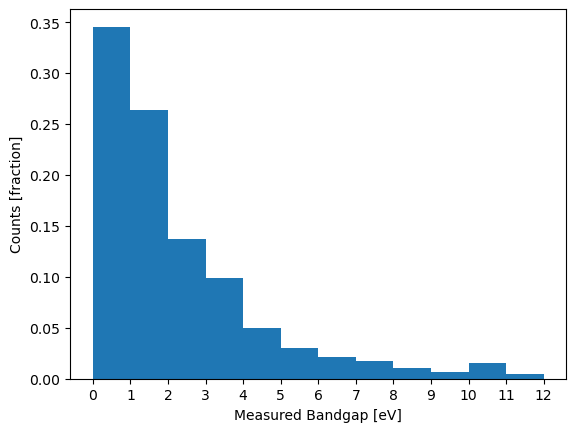

In [242]:
# we'll also define a simple histogram plotting function to use later
def histogram_plot(data):
    fig1,ax1 = plt.subplots()
    ax1.hist(data,bins=range(13),density=1)
    ax1.set_xticks(range(13))
    ax1.set_xlabel('Measured Bandgap [eV]')
    ax1.set_ylabel('Counts [fraction]')
    plt.show()

histogram_plot(mastml_df_clean["Band gap values Clean"].astype("float"))

<div class = "exercise">

### Exercise 1.4<a name="e1.4"></a>

Questions:  
1. Is our band gap data balanced (i.e. uniformly distributed across its range)?
2. Given your answer to question 1, Would you expect that the model has similar performance between 0-2 eV as between 10-12 eV?

Challenges (optional questions):
3. What is one thing we can do to address this issue?

[Check or Submit Answers](#a1.4)

</div>

### Answer Exercise 1.4

1. According to the histogram polt, we have more data in 0–4 than 5–12. It appears to be right-skewed or positively skewed, meaning that there are more data points at lower band gap values, and the frequency of data points decreases as band gap values increase. Thus, it is not uniformly distributed across its range and our band gap data is not balanced.

2. Given the imbalance in the band gap data distribution, we would not expect the model to have similar performance between the 0-2 eV range and the 10-12 eV range. Since there are more data points in the lower band gap range (0-2 eV), the model would likely have more data to learn from in that range and may perform better there. Conversely, in the 10-12 eV range, where there are fewer data points, the model may have limited examples to learn from, potentially leading to lower performance in that range.

Let's also try to get a feel for the compositions present in our dataset.  
Specifically we'll focus on looking at which elements are present in the data, and in what quantity.

In [243]:
import pymatgen.core.composition

# parse out individual elements for each formula using pymatgen's composition parser
element_list = list()
for idx in mastml_df.index:
    element_list.extend(pymatgen.core.composition.Composition(mastml_df["chemicalFormula Clean"][idx]).elements)

In [244]:
# setup a counter to count each element
temp_counter = Counter(element_list)
element_tuples = list(zip(list(temp_counter.keys()),list(temp_counter.values())))
element_df = pd.DataFrame(element_tuples,columns=["Element","Count"])
element_df_sorted = element_df.sort_values(by=["Count"],ascending=False)

In [245]:
element_df_sorted.head(5)

,Element,Count
8,O,240
10,Se,196
9,S,191
11,Te,187
15,As,141


In [246]:
element_df_sorted.tail(5)

,Element,Count
66,Ta,3
39,Y,3
70,Ir,2
62,Tm,1
64,Lu,1


<div class = "exercise">

### Exercise 1.5<a name="e1.5"></a>
Questions:  
1. What are the five most common elements in the dataset?  
2. What are the five least common elements in the dataset?  
3. Rank your confidence in the following predictions:  

    - predictions containing Oxygen (oxides)  
    - predictions containing Iridium  
    - predictions containing an element that doesn't appear in the dataset at all  

[Check or Submit Answers](#a1.5)

</div>

### Answer Exercise 1.5

1. O, Se, S, Te, As

2. Ta, Y, Ir, Tm, Lu

3. Scale 0–10, with 10 being very confident and 0 being no hope at all

- predictions containing Oxygen (oxides): almost 10, very confident, because it is the most common element in the dataset, and its frequent presence suggests it plays a significant role in various compounds;

- predictions containing Iridium: about 3—with some hope or moderate confidence, but not too much, because it is the third least common element, making predictions involving it less common but still plausible;

- predictions containing an element that doesn't appear in the dataset at all: Lu, because it is the least common element. As elements not present in the dataset are virtually impossible to predict accurately, given no training data for reference.

In [247]:
# Output data to csv - note depending on when you run this the updated data file may have been pregenerated so this cell isn't technically necessary.
output_path = r'C:/Users/jhyan/Documents/all/Lectures/UW-Madison_course_enroll/MSE_401/data/bandgap_data_v3.csv'

if os.path.isfile(output_path):
    print(output_path," exists, not creating new file")
else:
    mastml_df_clean.to_csv(output_path)

C:/Users/jhyan/Documents/all/Lectures/UW-Madison_course_enroll/MSE_401/data/bandgap_data_v3.csv  exists, not creating new file


<div class = "section">

# 2. Feature Generation<a name="2"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Overview
This section covers generating features from chemical formulas in the dataset. This featurization step is necessary to turn the text representation of materials into a numerical representation that the models can understand! In order to make this notebook independent from outside code versioning as much as possible, we'll use pre-generated features using the MAST-ML code package instead of generating them in real time in this notebook. Though the features used are from a previous version of MAST-ML which generated a list of "composition average elemental properties" to represent each unique material.

## Learning Outcomes
1. Validate generated features by manual calculation
2. Assess generated features using criteria of variability
3. Inspect features for relative size and shape
3. Discuss qualities of a good feature


</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "lesson">

### MASTML Configuration<a name = "lesson2.1"></a>

<div class = "cellContent">

[Materials Simulation Toolkit for Machine Learning (MAST-ML)](https://mastmldocs.readthedocs.io/en/latest/) is an open-source Python package designed to broaden and accelerate the use of machine learning in materials science research. It supports a full end-to-end machine learning workflow including all of the steps that we code by hand in this lab, but here we will talk through how specifically it generates Composition Average Elemental Properties to featurize a dataset. 

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [248]:
# get a new dataframe of generated features from the pregenerated matml run.
#cwd = os.getcwd()
file_path = r'C:/Users/jhyan/Documents/all/Lectures/UW-Madison_course_enroll/MSE_401/data/generated_features.csv'
generated_features_path = os.path.join(file_path)
features_df = pd.read_csv(generated_features_path)

The raw MASTML output combines the original data and the generated features in one single dataframe, which isn't ideal. To make our next step (feature engineering) easier, We will split it into two dataframes:
1. `target_data_df`: target values (outputs)
2. `features_df`: features (inputs)

In [249]:
#split features_df into two dataframes
target_data_df = pd.DataFrame([features_df["chemicalFormula Clean"],features_df["Band gap values Clean"],features_df["Band gap units"],features_df["index"],features_df["Reliability"]]).T
features_df = features_df.drop(columns=['index','Reliability','Band gap values Clean','Band gap units','chemicalFormula Clean'])

Now, let's take a look at our target values first. Note that it still contains other input information (such as chemical formula) to help you contextualize what the bandgap values mean. Later, we will drop these columns as they won't be used in the model training.

In [250]:
target_data_df # our original dataset with inputs and outputs

,chemicalFormula Clean,Band gap values Clean,Band gap units,index,Reliability
0,Li1F1,13.105,eV,0,1
1,Li1Cl1,9.33,eV,6,1
2,Li1Br1,7.95,eV,7,1
3,Li3Sb1,1.0,eV,9,1
4,Li1I1,6.0,eV,10,1
...,...,...,...,...,...
462,Bi1I3,1.9625,eV,1437,1
463,Bi,0.015,eV,1445,1
464,Th1O2,4.625,eV,1448,1
465,UO,1.5,eV,1455,1


Let's also take a look at the features generated. Looking at the column names you will notice that each of them follows the pattern of: ElementalProperty_composition_average

Some of these properties may be familiar to you such as AtomicWeight, which can be looked up in the periodic table of the elements. Others may be a bit harder to understand from their shorthand such as BCCefflatcnt, which stands for Body Centered Cubic effective lattice constant. In this case this property is describing information about how long certain bond lengths are within an idealized crystal of the element. Even though they are more complex they have still be tabulated by previous researchers and therefore MAST-ML is able to simply look them up from known resources to calculate the properties shown.

In [251]:
# features generated
features_df.head(7)

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,AtomicWeight_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average,BCCfermi_composition_average,BCCmagmom_composition_average,BCCvolume_pa_composition_average,BCCvolume_padiff_composition_average,...,SecondIonizationEnergy_composition_average,ShearModulus_composition_average,SpaceGroupNumber_composition_average,SpecificHeatCapacity_composition_average,ThermalConductivity_composition_average,ThermalExpansionCoefficient_composition_average,ThirdIonizationEnergy_composition_average,n_ws^third_composition_average,phi_composition_average,valence_composition_average
0,6.0,1.1350,9311.576313,12.969702,5.772386,-1.346741,-0.679877,0.0,12.470,-0.680417,...,55.80400,2.10,122.00,2.20300,42.36395,923.00,92.57900,0.490,1.4250,1.0
1,10.0,1.2700,9169.525548,21.197000,6.658641,-1.410040,1.219961,0.0,18.525,-2.020417,...,50.22400,2.10,146.50,2.03100,42.35445,23.00,81.03100,0.490,1.4250,4.0
2,19.0,1.3450,32.035942,43.422500,6.919518,-1.432083,1.117212,0.0,21.035,-2.001667,...,49.21900,2.10,146.50,1.90400,42.41100,23.00,79.22550,0.490,1.4250,4.0
3,15.0,1.5600,23.705899,35.645750,6.704252,-2.371630,2.267697,0.0,19.155,-1.180000,...,61.61100,8.15,213.25,2.73825,69.60000,37.25,98.16325,1.050,3.2375,2.0
4,28.0,1.4400,32.101458,66.922735,7.343549,-1.459519,2.360221,0.0,25.935,-3.869167,...,47.88450,2.10,146.50,1.86350,42.57450,66.50,77.72550,0.490,1.4250,4.0
5,23.0,1.5875,25.028908,57.450850,6.767748,-2.372997,2.286196,0.0,19.860,-0.822500,...,61.65025,6.15,174.75,2.71700,65.49250,37.85,98.22800,1.025,3.1750,2.0
6,6.0,0.9250,9300.147671,12.505791,4.946102,-3.057512,5.584821,0.0,7.565,-0.932500,...,26.66400,66.00,103.00,1.37250,100.13370,395.65,104.41350,0.835,2.5250,2.0


<div class = "exercise">

### Exercise 2.1<a name="e2.1"></a>
Questions:  
1. How many features have we generated?  

[Check or Submit Answers](#a2.1)

</div>

In [252]:
print("There are", features_df.shape[1], "features that we generated.")

There are 87 features that we generated.


<div class = "lesson">

### Validating compositional average features<a name = "lesson2.2"></a>

<div class = "cellContent">

The Features that we've generated are all compositional averages of elemental properties. Using an existing database of elemental properties, the MASTML code reads in each of the chemical formulas in the dataset and combines each elemental property for each element in the formula according to the following equation:  
  
\begin{equation}
Property\_CompositionAverage = \frac{A \cdot Property\_Value_A + B \cdot Property\_Value_B}{A + B}
\end{equation}
  
Where A and B are the amounts of each element in the formula.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

<div class = "exercise">

### Exercise 2.2<a name="e2.2"></a>
Questions:  
1. Calculate the $AtomicNumber\_CompositionAverage$ for the chemical Formula $\text{Li}_3\text{Sb}_1. (AtomicNumber_\text{Li} = 3, AtomicNumber_\text{Sb} = 51)$

[Check or Submit Answers](#a2.2)

</div>

### Answer Exercise 3.2

Based in the formula above:

AtomicNumber_CompositionAverage = (3 X 3 + 1 X 51) / (3 + 1) = 15

<div class = "section">

# 3. Feature Engineering<a name="3"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Overview
The next big step we need to do before building models and making prediction is to make sure our features are useful for modeling. We'll perform three checks on our features that should improve their usefulness. This step is similar to the initial dataset cleaning / pre-processing that we did at the start of the lab, except now we're focusing on "cleaning" our features instead of cleaning the output data and compositions.

Feature Engineering Steps:  
1) Remove Constant Columns  
2) Remove Highly Correlated Columns  
3) Normalize Features  


## Learning Outcomes
1. Explain benefits of feature normalization, removing correlated features, and removing constant features
2. Recall that good features should be able provide information about the target variable
3. Recall that good features provide unique information about the target variable
4. Define a basic normalization scheme
5. Execute a normalization scheme


</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "lesson">

### Remove constant columns<a name = "lesson3.1"></a>

<div class = "cellContent">

Columns that have a constant value for all data points have no information and can't possibly help the ML model learn anything.  
We'll throw those out.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [253]:
# Remove Constant Columns
features_df_noconstant = features_df.loc[:, (features_df != features_df.iloc[0]).any()] 

# report number of columns
len(features_df_noconstant.columns)

86

<div class = "exercise">

### Exercise 3.1<a name="e3.1"></a>
Questions:  
1. How many features do we have left?  
2. Should you worry about having too few useful features? 

[Check or Submit Answers](#a3.1)

</div>

### Answer Exercise 3.1

1. 86 features

2. You shouldn't be overly concerned about having too few useful features, as columns with constant values typically don't provide any information about the data in machine learning models and may even have a negative impact on model performance. Therefore, removing these columns with constant values is typically part of data preprocessing to improve model efficiency and performance. In some cases, reducing the number of features can also lower model complexity and prevent overfitting. However, it's important to ensure that a sufficient number of relevant and informative features are retained for the model to make accurate predictions. Therefore, the key is to ensure that the feature selection process is carefully considered to find the most relevant and useful features.

<div class = "lesson">

### Remove highly correlated features<a name = "lesson3.2"></a>

<div class = "cellContent">

Features that are extremely similar don't give any additional information beyond the first appearance.  
They can also confuse the model by giving very similar information that may essentially overload the model.  
Before we remove features, let's calculate the `correlation matrix` for all the features. 

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [254]:
# Remove Highly correlated Features
# using notes here for methodology: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

features_corr_df = features_df_noconstant.corr(method="pearson").abs()
features_corr_df.iloc[:5, :5] # Preview the first 5 rows/columns of the correlation matrix

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,AtomicWeight_composition_average,BCCefflatcnt_composition_average
AtomicNumber_composition_average,1.000000,0.585580,0.405061,0.998598,0.628049
AtomicRadii_composition_average,0.585580,1.000000,0.609457,0.571820,0.918506
AtomicVolume_composition_average,0.405061,0.609457,1.000000,0.382296,0.449378
AtomicWeight_composition_average,0.998598,0.571820,0.382296,1.000000,0.615523
BCCefflatcnt_composition_average,0.628049,0.918506,0.449378,0.615523,1.000000


A better way to interpret this correlation matrix is by plotting a heatmap: The darker the color on the plot, the more highly correlated features are.   
Note the diagonal line with all 1 values. This is because each feature is by definition perfectly correlated with itself.

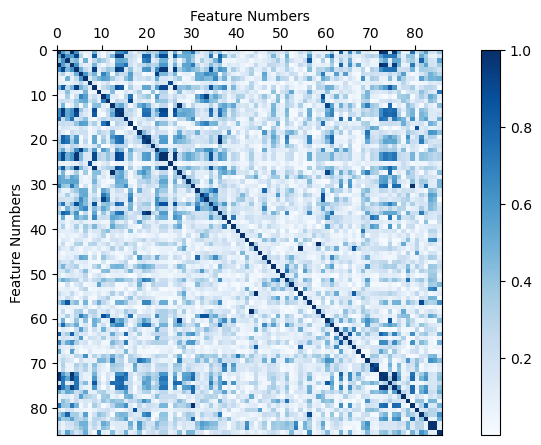

In [255]:
# before removing correlated features
fig1, ax1 = plt.subplots(figsize=(10,5))
c = ax1.pcolor(features_corr_df,cmap="Blues")
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')
plt.colorbar(c,ax=ax1)
plt.show()

In [256]:
# Filter the features with correlation coefficients above 0.95
upper = features_corr_df.where(np.triu(np.ones(features_corr_df.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
features_df_lowcorr = features_df_noconstant.drop(columns=to_drop)
# recalculate the correlation matrix so we can compare
features_corr_df_update = features_df_lowcorr.corr(method="pearson").abs()

C:\Users\jhyan\AppData\Local\Temp\ipykernel_2980\3669307771.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = features_corr_df.where(np.triu(np.ones(features_corr_df.shape), k=1).astype(np.bool))


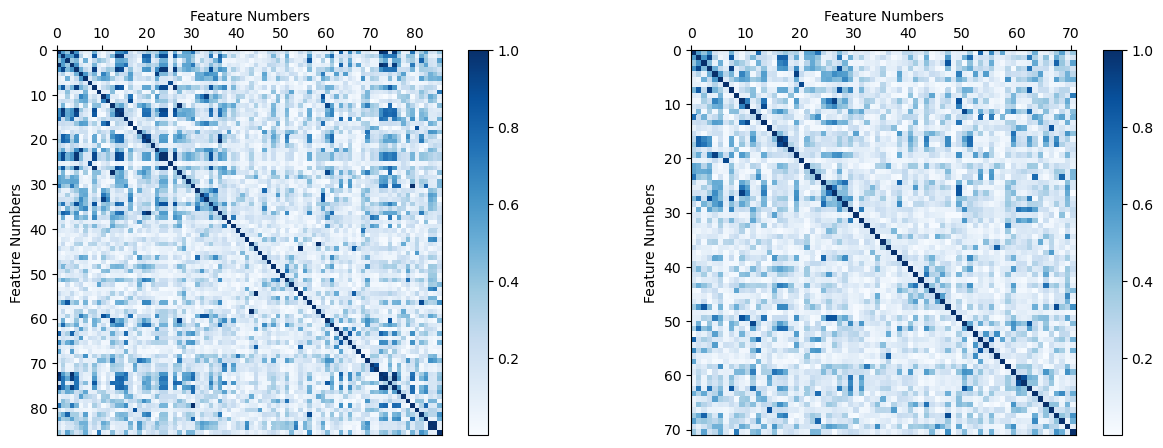

In [257]:
# plot correlation after removing highly correlated features

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
c1 = ax1.pcolor(features_corr_df,cmap="Blues")
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')

plt.colorbar(c1,ax=ax1)

c2 = ax2.pcolor(features_corr_df_update,cmap="Blues")
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Feature Numbers')
ax2.set_ylabel('Feature Numbers')
ax2.set_aspect('equal')
plt.colorbar(c2,ax=ax2)
plt.show()

In [258]:
len(features_df_lowcorr.columns)

71

<div class = "exercise">

### Exercise 3.2<a name="e3.2"></a>
Questions:  
1. After filtering for highly correlated features how many features do we have left?  
2. Are we worried about having too few useful features? 

[Check or Submit Answers](#a3.2)

</div>

### Answer Exercise 3.2

1. 71

2. After filtering for highly correlated features, there is a potential concern about having too few useful features left in the dataset. Removing highly correlated features is a common data preprocessing step to reduce multicollinearity and enhance the interpretability and performance of machine learning models. However, it should be done carefully. If a large number of features were highly correlated and were subsequently removed, it's possible that the remaining set of features may be insufficient to capture the complexity of the underlying data. This could lead to a loss of important information, reduced model expressiveness, and potentially poorer predictive performance. Therefore, it's essential to strike a balance between removing redundant or correlated features and retaining enough relevant features to build an effective predictive model. Careful feature selection and domain knowledge can help ensure that the final feature set is both informative and manageable for the machine learning task at hand.

<div class = "lesson">

### feature normalization<a name = "lesson3.3"></a>

<div class = "cellContent">

Finally the last thing that we need to do is perform some normalization or rescaling of our features.  
Lets take a look at the updated feature dataset and pay attention to the types of features, their ranges, and scale similar to what we did for the band gap earlier

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [259]:
features_df_lowcorr.head(5)

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average,BCCfermi_composition_average,BCCmagmom_composition_average,BCCvolume_pa_composition_average,BCCvolume_padiff_composition_average,BoilingT_composition_average,...,NsValence_composition_average,Polarizability_composition_average,SecondIonizationEnergy_composition_average,ShearModulus_composition_average,SpaceGroupNumber_composition_average,ThermalConductivity_composition_average,ThermalExpansionCoefficient_composition_average,ThirdIonizationEnergy_composition_average,n_ws^third_composition_average,valence_composition_average
0,6.0,1.135,9311.576313,5.772386,-1.346741,-0.679877,0.0,12.470,-0.680417,849.94,...,1.50,12.44600,55.8040,2.10,122.00,42.36395,923.00,92.57900,0.49,1.0
1,10.0,1.270,9169.525548,6.658641,-1.410040,1.219961,0.0,18.525,-2.020417,926.98,...,1.50,13.25750,50.2240,2.10,146.50,42.35445,23.00,81.03100,0.49,4.0
2,19.0,1.345,32.035942,6.919518,-1.432083,1.117212,0.0,21.035,-2.001667,973.50,...,1.50,13.69250,49.2190,2.10,146.50,42.41100,23.00,79.22550,0.49,4.0
3,15.0,1.560,23.705899,6.704252,-2.371630,2.267697,0.0,19.155,-1.180000,1676.25,...,1.25,19.90125,61.6110,8.15,213.25,69.60000,37.25,98.16325,1.05,2.0
4,28.0,1.440,32.101458,7.343549,-1.459519,2.360221,0.0,25.935,-3.869167,1036.15,...,1.50,14.68000,47.8845,2.10,146.50,42.57450,66.50,77.72550,0.49,4.0


It should be fairly apparent that our features come in many shapes and sizes. Machine Learning algorithms can be very sensitive to these differences.  
For example one feature may be several orders of magnitude larger in values and in range of values.  
This can make some algorithms significantly biased towards those features so the best practice is usually to perform some alteration to make all the features look similar, while still preserving the information they contain

In our case we're going to linearly rescale the features so that they all have the same minimum and same maximum. If you're interested in checking of the details of how this is done you can check out the documentation for the Scikit-learn method we'll be using: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [260]:
minmax_features = MinMaxScaler().fit_transform(features_df_lowcorr)
minmax_features_df = pd.DataFrame(minmax_features,columns=features_df_lowcorr.columns)
minmax_features_df.iloc[:5, :5]

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average
0,0.012821,0.190923,0.583946,0.176111,0.893262
1,0.064103,0.275430,0.575030,0.310002,0.884705
2,0.179487,0.322379,0.001553,0.349415,0.881725
3,0.128205,0.456964,0.001030,0.316893,0.754709
4,0.294872,0.381847,0.001557,0.413475,0.878016


<font color=blue> challenge: Turn off the feature normalization. Feature normalization is a common practice to enable models to better learn from multiple features when some are on significantly different scales. 
Try removing this section to see how the later results are affected. In the case of the decision tree / random forest model being used by default this may not be the case, but what about other model types? Try doing the same thing with a Kernel Ridge Regression Model for example. </font>

Notice how compared to some of the previous sections, performing the scaling only took a few lines of code. This is the power of using existing code packages and tools that are already out there!

<div class = "section">

# 4. Setup for Model Evaluation<a name="4"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Overview
Before jumping in to model building, we have one last thing to think about: How are we going to know how well our models are performing?  

We can test the model by asking it to predict the bandgap value of materials, compare it with measured values, and calculate its prediction error using a range of error metrics (e.g. RMSE, R2, etc), but the naive approach of training and testing the model using the same dataset gives us a <u>biased estimate</u> of model error because the model has *seen* all the data we are asking it to predict already.  

To get an <u>unbiased estimate</u> of model error, we can employ a simple <u>cross-validation</u> technique: Setting aside a subset of data as our <u>test set</u>, which the model won't access during the training process. The rest of the data constitutes the <u>training set</u>, which is used to train the model. This allows us to then evaluate model performance by comparing model prediction on both seen data (training set) and unseen data (test set).

## Learning Outcomes
1. Explain how model evaluation is tied directly to ML application
2. Propose a train test split to only predict high bandgap materials
3. Define how training and test splits are used by a model


</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "lesson">

### Establishing train/test split<a name = "lesson4.1"></a>

<div class = "cellContent">
    
For now lets split off 10% of the data for testing.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

First, we store our cleaned and normalized inputs and outputs in new variables `X` and `y` for easier understanding and manipulation.

In [261]:
X = minmax_features_df                         # inputs/features 
y = target_data_df["Band gap values Clean"] # outputs/targets

Normally, if you are using machine learning to predict the bandgap (or other properties) of a novel material, you won't know its real bandgap until you fabricate and measure it in the lab, which is bad news for instructors: What's the point if we weren't able to validate the predictions and show you the power of machine learning?   

Therefore for instructional purposes, we will stage our prediction by using 5 common materials with known bandgap values instead - Si, SiO2, C, NaCl, and Sn - and removing them from the dataset.

The following code accomplishes the above and is not important otherwise. Note that you do **NOT** need this step in a real research setting.

In [262]:
# Find prediction compounds and generate inputs for them to make predictions later.
def extract_predictions(formula="string"):
    index_prediction = target_data_df[target_data_df["chemicalFormula Clean"]==formula].index
    xpredict = X.loc[index_prediction].copy()
    ypredict = y.loc[index_prediction]
    
    return (index_prediction,xpredict,ypredict)

In [263]:
index_predict_Si, xpredict_Si, ypredict_Si = extract_predictions(formula="Si")
index_predict_SiO2, xpredict_SiO2, ypredict_SiO2 = extract_predictions(formula="Si1O2")
index_predict_C, xpredict_C, ypredict_C = extract_predictions(formula="C")
index_predict_Sn, xpredict_Sn, ypredict_Sn = extract_predictions(formula="Sn")
index_predict_NaCl, xpredict_NaCl, ypredict_NaCl = extract_predictions(formula="Na1Cl1")

X_predict = X.drop(index=index_predict_Si.to_list()+index_predict_SiO2.to_list()+index_predict_C.to_list()+index_predict_Sn.to_list()+index_predict_NaCl.to_list())
y_predict = y.drop(index=index_predict_Si.to_list()+index_predict_SiO2.to_list()+index_predict_C.to_list()+index_predict_Sn.to_list()+index_predict_NaCl.to_list())

Then, we use the `train_test_split()` method from the `scikit-learn` package to generate the split. In this case, our input data `X` and output data `y` are split into 4 parts:    
- `X_train`: training set input data  
- `X_test`: test set input data  
- `y_train`: training set output data  
- `y_test`: test set output data  

We will continue referencing these 4 objects throughout the rest of this lab.

In [264]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True,random_state=seed)

<div class = "lesson">

### Evaluating train/test split<a name = "lesson4.2"></a>

<div class = "cellContent">
    
One thing that can be interesting to check is how "representative" the splits are of the full dataset. In an ideal world we'd have enough data that even splitting out 10% of it would have enough data in each set to accurately reproduce the whole dataset.  

Below lets plot the same histogram of band gap values as we did before, and then plot the same for the train and test set.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

C:\Users\jhyan\AppData\Local\Temp\ipykernel_2980\1844405501.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  l1 = sns.distplot(y_train.astype("float"), hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"edgecolor": "white"}, label = 'training set', ax = ax1)
C:\Users\jhyan\AppData\Local\Temp\ipykernel_2980\1844405501.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see

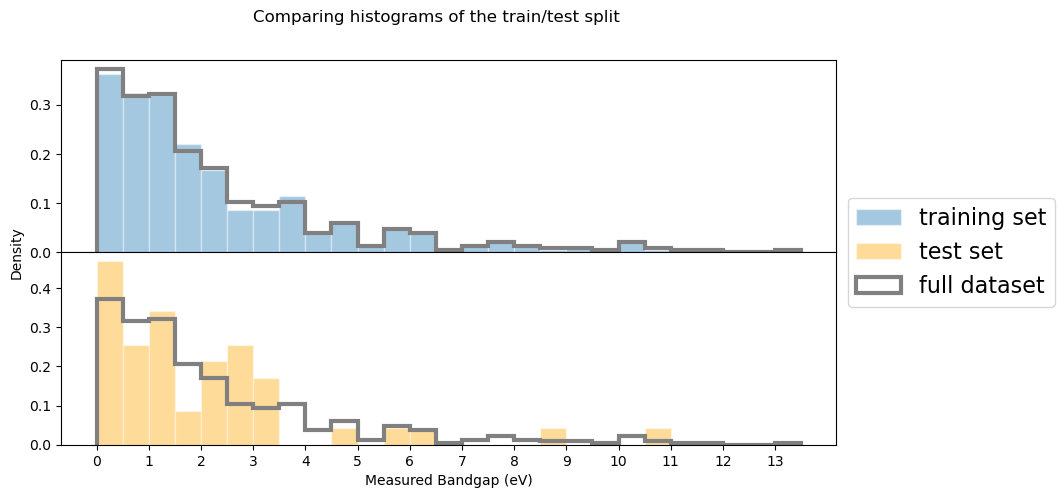

In [265]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5), sharex = True, gridspec_kw={'hspace': 0})
fig.set_tight_layout(False)
myarray = mastml_df_clean["Band gap values Clean"]

bins = np.true_divide(range(28),2)

l1 = sns.distplot(y_train.astype("float"), hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"edgecolor": "white"}, label = 'training set', ax = ax1)
l2 = sns.distplot(y_test.astype("float"), hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"edgecolor": "white", "color": "orange"}, label = 'test set', ax = ax2)
l3 = sns.distplot(myarray, hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"histtype": "step","linewidth": 3, "alpha": 1, "color": "grey"}, ax = ax1)
l4 = sns.distplot(myarray, hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"histtype": "step","linewidth": 3, "alpha": 1, "color": "grey"}, label = 'full dataset', ax = ax2)


ax1.set_xticks(range(14))
ax2.set_xticks(range(14))
ax2.xaxis.label.set_visible(False)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.suptitle('Comparing histograms of the train/test split')
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.legend(handles, labels, loc = 'center left', bbox_to_anchor=(1, 0.5),prop={'size': 16})
plt.xlabel('Measured Bandgap (eV)')
_ = plt.ylabel('Density')

<div class = "exercise">

### Exercise 4.1<a name="e4.1"></a>
Questions:  
1. Does it look like we have enough data that the test split is identical to the full dataset and the train split?

[Check Answers](#a4.1)

</div>

### Answer Exercise 4.1:  
The test dataset should have a similar data distribution as the training dataset. This means that the test data should encompass similar features and class distributions as those present in the training data in order to reflect the model's generalization ability during testing. According to the bar chart above, the testing dataset and training dataset don't have quite a similar distribution. Therefore, I think we don't have enough data that the test split data is representative of the full dataset and the train split data.

<div class = "section">

# 5. Fitting and Evaluating a Default Model<a name="5"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Overview

Significance:
Status quo: what did we do in last section
    So far, our dataset has been inspected, properly cleaned and split into training and test sets.
Gap: 
Fill gap: 

what you will do: Now we finally get to the fun part: Building models and make predictions! We're going to fit a decision tree model to the training data we created in the previous section. Then we'll use that model to predict both the test data and the training data.


## Learning Outcomes
By the end of this section, you will be able to:
1. Evaluate model performance
    1. Analyze parity plots for qualitative performance of models
    2. Interpret error metrics to compare model performance
2. Recognize value of test data predictions in assessing predictive ability compared to training data
3. Identify key indicators of overfitting
4. Estimate model performance for two different ML applications


</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "lesson">

### Fitting the decision tree model<a name = "lesson5.1"></a>

<div class = "cellContent">

We'll train or "fit" a decision tree model using the `RandomForestRegressor().fit()` class from the `scikit-learn` package we imported at the beginning of the notebook. Notice how this only takes 1 single line of code because we're leveraging existing code package that's been built for us already. Also note that the actual class name that we're using is called RandomForestRegressor. This RandomForestRegressor class can be configured to be identical to a decision tree, however the reason we'll use it is because later on it will give us more flexibility when we start changing the model. A decision tree model is basically a random forest model with 1 tree, so we'll set the `n_estimators` hyperparameter to 1 to make the model mimic a single decision tree.

Keep in mind that machine learning is much more than this 1 line of code: You have already gone through a ton of preprocessing and decision making to reach this step!

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [266]:
Default_model = RandomForestRegressor(random_state=seed,n_estimators=1,bootstrap=False).fit(X_train,y_train) # fit the decision tree model
print('Model training complete.')
# print('Tree depth:', [estimator.tree_.max_depth for estimator in Default_model.estimators_])
# for importance in zip (estimator.feature_importances_ for estimator in Default_model.estimators_):
#     print (importance)
#print('Leaf nodes:',[estimator.tree_.n_leaves for estimator in Default_model.estimators_])

Model training complete.


The outputs above describes the <u>hyperparameters</u> selected (in this case, by default) to fit the decision tree model.  and the <u>parameters</u> being generated in the training process. You may also wonder what the decision tree *looks* like, and we will visualize the entire tree later.  

We'll also go into more detail about what these (hyper)parameters are at a later time when they become more relevant. For now, we're glossing over because simply knowing these (hyper)parameters doesn't help us evaluate model quality until we have seen its performance: How accurately and precisely can our decision tree model predict bandgaps? We will jump into that.

As one last motivation as we start asssessing our model, lets predict two band gaps of materials you're probably familiar with, Silicon and Silica. Silicon is used in practically every electronic device as a semiconductor, and Silica is basic window glass. You can look up the values of their band gaps fro reference, but look how just in a few lines of code the model can already give us a rough idea of their values. We know Silicon is a semi-conductor and it's bandgap should be fairly low, while the band gap for Silica has to be much higher because window glass shouldn't absorb any light at all. Based on these predictions it seems like the model can already pick up on these trends! But as we've been mentioning, just making a few select predictions is not a good way to measure overall performance, in the next sections we'll dig into more robus ways to measure the performance!

In [267]:
Default_model_all_data = RandomForestRegressor(random_state=seed,n_estimators=1,bootstrap=False).fit(X_predict,y_predict)

print("Predicting Silicon Band Gap: ",Default_model_all_data.predict(xpredict_Si))

print("Predicting Silica Band Gap: ",Default_model_all_data.predict(xpredict_SiO2))

Predicting Silicon Band Gap:  [2.]
Predicting Silica Band Gap:  [6.]


<div class = "lesson">

### Evaluating model performance on training and test data<a name = "lesson5.2"></a>

<div class = "cellContent">

To evaluate the model performance, we will use it to predict bandgaps of materials it was trained on (training set) as well as materials it has not seen before (test set), and we will compare its performance on both datasets.

There are two main ways to understand and evaluate prediction performance:
1. Qualitatively, we can create a scatter plot with predicted values on the y-axis and the actual measured values on the x-axis, known as <u>parity plots</u> or <u>predicted versus actual plots</u>. The more closely aligned the data points are to the ideal diagonal line, where each prediction matches the measured value perfectly, the better the model performs on that specific dataset. Parity plots also surface outliers, trends and patterns in the prediction results.
2. Quantitatively, we can measure model performance using statistical error metrics. Some of these error metrics, such as RMSE and R2, will be familiar to you if you have taken an introductory statistics class.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

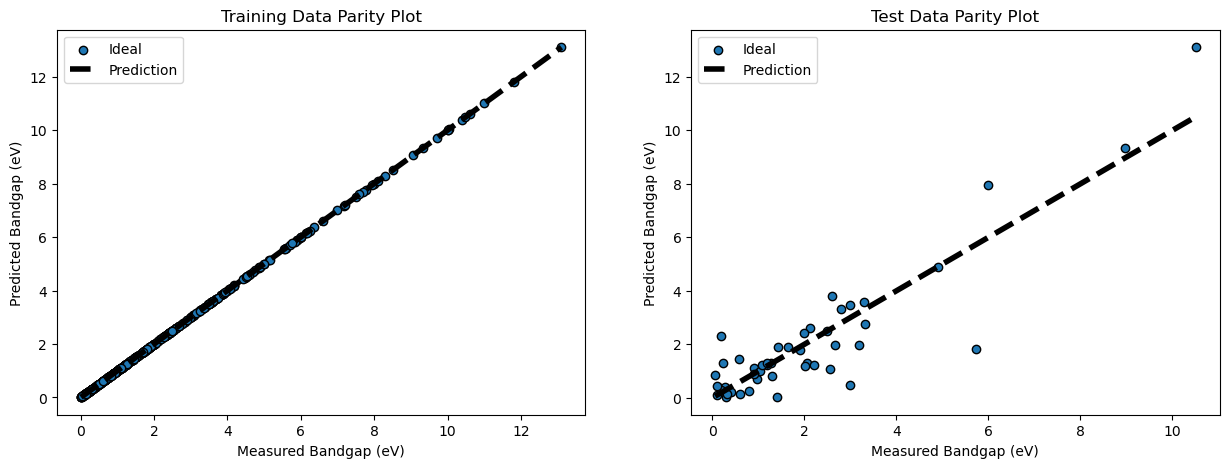

,Error Metric,Training Data,Test Data,Note
0,RMSE,0.0003 (eV),1.0492 (eV),(0.0 for perfect prediction)
1,RMSE/std,0.0001,0.4884,(0.0 for perfect prediction)
2,MAE,0.0 (eV),0.6811 (eV),(0.0 for perfect prediction)
3,R2,1.0,0.7614,(1.0 for perfect prediction)


In [268]:
Train_predictions = Default_model.predict(X_train)    # Make predictions on training data
Test_predictions = Default_model.predict(X_test)      # Make predictions on testing data

parity_plots_side_by_side(y_train,Train_predictions,y_test,Test_predictions,title_left="Training Data Parity Plot",title_right="Test Data Parity Plot") # build both plots
parity_stats_side_by_side(y_train,Train_predictions,y_test,Test_predictions,"Training Data","Test Data")  # print error metrics for training data

We've generated a few different error metrics which we can use to asses the model's performance. One that we'll focus on throughout the lab is the Root Mean Squared Error (RMSE), which we are going to use as a rough error bar when talking about predictive ability of the model. Meaning when we're analyzing performance and asking questions about how accurate the model is is making predictions this is the statistic we'll reference. It's important to note that this is just one choice we could make for assigning an error bar to the model's predictions. There are other, more complex methods for generating error bars for model predictions, and we're going to ignore those for now in favor of simplicity. So whenever we're asking you to think about the predictive power of the model for now think of model predictions as having a predicted value plus or minus the RMSE.

<div class = "exercise">

### Exercise 5.1<a name="e5.1"></a>
Questions:  
1. Take a look at the training parity plot. Evaluate model prediction on training data by answering the following:  
    1. Is there enough information in the features to make predictions? Do the features model this data (training) well?
    2. Are there any outliers?  
    3. Does it consistently overpredict/underpredict bandgap values in any particular range?  

Take a look at all the training data statistics (RMSE, RMSE/std, MAE, R2). Assume these metrics, specifically RMSE, can be used to put an error bar on any predictions we make. Recall that we identified two ML applications for this model, and answer:

2. Can we use this model to predict bandgap values of materials for making single-junction solar cell, which requires a bandgap between 1.1 and 1.7eV?
3. Can we use this model to predict high bandgap materials above 3 eV?

[Check or Submit Answers](#a5.1)

</div>

### Answer Exercise 5.1

1. From the training data plot, if the model performs well on the training data, the predicted values should closely align with the actual values, forming a distribution that closely follows a 45-degree line. If the plot shows that most data points align along the 45-degree line, it can be inferred that the features contain sufficient information, and the model has effectively fit these features into the training data. Therefore, I think there is enough information in the features to make predictions. Through the training plot, it is possible to observe whether there are outliers that are distinctly different from the other data points. From the graph above, there are no outliers shown. Therefore, there are no outliers. If the predicted values deviate from the 45-degree line and consistently exhibit overestimation or underestimation within a certain range of bandgap values, then the model may perform poorly within that range. From the training data plot, there is no predicted value deviate from the 45-degree line. There is no overpredict/underpredict bandgap values in any particular range.

2. RMSE (Root Mean Square Error) for the training data is 0.0003 eV, while for the test data, it's 1.0492 eV. The RMSE is a measure of prediction accuracy, and in this case, the RMSE for the test data is significantly higher than for the training data. The RMSE value indicates the average prediction error, and an RMSE of 1.0492 eV for the test data is relatively high compared to the desired bandgap range of 1.1 - 1.7 eV. Given these statistics, it's likely that the model may not be accurate enough to reliably predict bandgap values within the required range for single-junction solar cells. The prediction error appears to be larger than what is acceptable for this application.

3. The model has an RMSE of 1.0492 eV in the test data, while it has an RMSE of 0.0003 eV in the training data. This indicates that the model's performance is relatively poor in predicting high bandgap materials, as it struggles to generalize well to the test data, resulting in a significant error range. The model's RMSE and RMSE/std for the test data are 1.0492 eV and 0.4884, respectively. Both of these values indicate relatively high prediction errors for the test data. For applications that require high bandgap materials (greater than 3 eV), the model's errors may be too substantial, making it potentially unreliable in such cases.

<div class = "exercise">

### Exercise 5.2<a name="e5.2"></a>
Questions:  
1. Take a look at the test parity plot. Evaluate model prediction on test data by answering the following:  
    1. Is there enough information in the features to make predictions?
    2. Are there any outliers?  
    3. Does it consistently overpredict/underpredict bandgap values in any particular range? 
2. Take a look at all the test data statistics (RMSE, RMSE/std, MAE, R2). Given what you now know about model performance on test data, can we still use this model to predict bandgap values of materials for making single-junction solar cell, which requires a bandgap between 1.1 and 1.7eV?  
3. Again think about the use case for identifying high band gap materials above 3 eV, could the model differentiate between low and high bandgap materials?

[Check or Submit Answers](#a5.2)

</div>

### Answer Exercise 5.2
1. Ideally, data points should align along the 45-degree line in the parity plot, indicating that the model's predictions match the actual values. If, in the training and testing plot, data points for both the training and test data closely follow the 45-degree line, it suggests that the model's performance is likely similar on both datasets. However, if data points for the test data deviate from the 45-degree line while those for the training data are closer to it, it may indicate that the model's performance is poorer on the test data. Therefore, the model is performing better on training data than testing data.

2. If the model fits the training data extremely well but performs poorly on the test data, it may be overfitting. If the model performs poorly on both the training and test data, it may be underfitting. If the model performs well on both datasets, it is likely an appropriate model. Based on the graphs, it should be overfitting.

3. In general, the test dataset is used to assess the model's performance on unseen data, making it suitable for evaluating the model's generalization ability. The training dataset is primarily used for model training and is not a reliable dataset for performance estimation because the model may perform well on the training data but poorly on new, unseen data. Therefore, we should use test data.

<div class = "exercise">

### Exercise 5.3<a name="e5.3"></a>
Questions:  
1. Compare both the parity plots and performance statistics for the training and test set. Is the model performing better on one set than the other, or is there no difference? (No calculation needed.)  
2. Which of the following most accurately describes this model: Underfit, overfit, or neither?
3. Should we use training data or test data to estimate model prediction performance?


[Check or Submit Answers](#a5.3)

</div>

### Answer Exercise 5.3

1. At the first density composition average (≤ 0.08) node, there are samples = 420 from the training data are included.

2. At the leaf node, there is samples = 1 are included at the leaf node.

3. samples = 1.

4. If the model performs well on the training data but poorly on the test data, and most leaf nodes contain a similar number of samples, it may be a sign of overfitting. If the model performs poorly on both the training and test data, and the distribution of samples in the leaf nodes is uneven, it may be a sign of underfitting. If the model performs well on both the training and test data, and the distribution of samples in the leaf nodes is even, it supports a well-fit model. Based on the result, it should be overfitting.

<div class = "lesson">

### Visualizing and interpreting the decision tree model (OPTIONAL)<a name = "lesson5.3"></a>

<div class = "cellContent">

It's always important and helpful to understand how your ML model makes predictions - even more so for materials scientists, who are more likely to trust the model prediction and fabricate the recommended materials if the prediction has an explanation that matches their physical intuition (or defies it in a scientifically justifiable way).

However, it's often a challenge because many ML models are "**black boxes**", the inner workings of which are not interpretable to humans at all. Decision trees are chosen for this lab partly because they are more interpretable than many other models. Even so, it becomes harder to extract physical instinct from them as they grow larger.

As a final step, we will visualize the default decision tree model to help you understand what we've built. While the visualization doesn't quantify its performance, it illustrates which features are important and explains the difference between model performances on training and test data.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

<div class = "info">

### *Large cell output!*


<div class = "cellContent">
    
The output of the next cell is very large! Click the left side of the output to expand it for a full view, or click again to minimize it.  

Minimizing the output after viewing also makes it easier to interact with the rest of the notebook.

</div> <!-- closes content -->
</div> <!-- closes protip -->

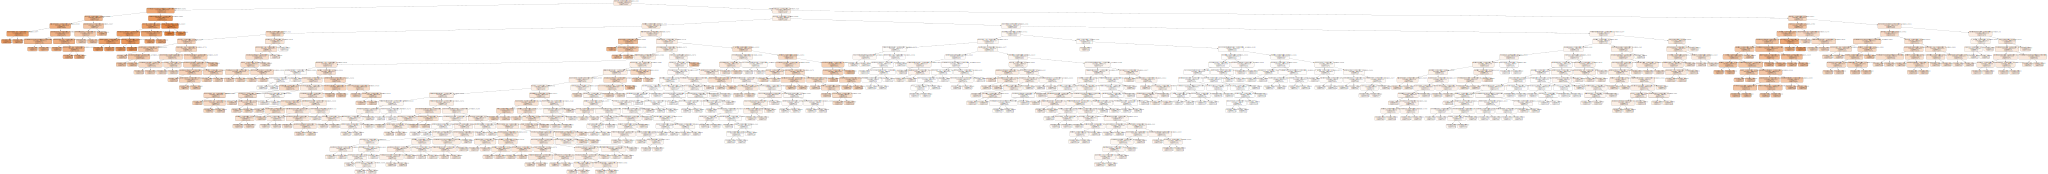

In [269]:
# generate an image of the default decision tree
dot_data = sklearn.tree.export_graphviz(Default_model.estimators_[0],out_file=None,feature_names=features_df_lowcorr.columns,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

<div class = "info">

<div class = "cellContent">
    
Locate the decision node `Density_composition_average ≤ 0.059` in the visualization above using Ctrl+F (Cmd+F on Macs).

</div> <!-- closes content -->
</div> <!-- closes protip -->


This visualization explicitly constructs each node in the default tree. Using the decision node `Density_composition_average ≤ 0.059` as an example, 

 It lists which feature the node splits on, gives the mse for the data at that split, how many samples are at the node, and the value of the estimated band gap if it was a leaf node.  
It should be immediately apparent that the tree is incredibly large, and and so we'll pick a few things to focus on as we look through it briefly.

<div class = "exercise">

### Exercise 5.4<a name="e5.4"></a>
Questions:  
1. Looking at the Density_composition_average node identified above, how many samples from the training data are included at this node?  
2. Trace the branch down from this node until you find a leaf node. How many samples are included at this leaf node?  
3. Inspect a few other leaf nodes until you identify how many samples are at the majority of leaf nodes, how many samples is this?  
4. based on your previous analysis of overfitting, underfitting, or well fit does this support that previous claim about how the model is fit?  


[Check or Submit Answers](#a5.4)

</div>

<font color=blue> challenge (optional): We're currently leaving out a fairly small percentage of the data, 10%. Try going back and changing this to a few different values to see how it changes the results. For example try: 5%, 25%, 50%, 75%.  
To do this you can edit the test_fraction parameter at the start of Section 4 and rerun the cells after that.</font>

<div class = "section">

# 6. Improving the Model by Optimizing Hyperparameters<a name="6"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Overview (edited)

In the previous section, we evaluated the performance of a default model based on its performance in predicting a single set of test data. While this model predicted the training data almost perfectly, predictions of the testing data showed significantly worse performance. This combination of a model that perfectly reproduces training data, but can't predict data it hasn't seen is a classic sign of <u>overfitting</u>. One way to address this issue to to try to alter the hyperparameters of the model.

When building our first model we used default settings from the `scikit-learn` package, we can attempt to improve the performance by optimizing the <u>hyperparameters</u> of a model (think of them as *tunable knobs*). 

This will be the penultimate task in this lab, before we select a final model and make predictions.

Remember that a machine learning model has two types of parameters:  
 - The first are the regular <u>parameters</u> of the model. These would be the coefficients in the case of a linear model; in the case of the decision tree, they are the nodes that get generated when the model is fit, and we don't set them directly.  
 - The second are the <u>hyperparameters</u>. These are the variables that we adjust to change how the model learns and how it gets fit. For example, for decision trees, we can limit how complex and large the tree can be by setting a number of hyperparameters including the maximum tree depth and the maximum leaf nodes. We can also increase the number of trees that we train and make a model that is an average prediction of these multiple trees.  

In this lab, we'll focus in on one hyperparameter specifically called <i>n\_estimators</i> . Each estimator is one decision tree, and by using the RandomForestRegressor class from sci-kit-learn we can increase this number to build multiple individual trees which will all try to predict our bandgaps. Taking average results from multiple decision trees can often improve model performance and reduces overfitting that can occur in a single decision tree.



## Learning Outcomes
1. Identify a hyperparameter for the random forest model
2. Perform a series of grid searches to find an optimal hyperparameter
3. Evaluate model performance for different hyperparameter configurations
4. Choose an optimal hyperparameter configuration
5. Assess overfitting from learning curves
6. Recall final optimized model training step before predictions can be made
7. Compare model validation techniques: k-fold CV vs. train/test split
8. Evaluate model performance for two different applications
9. Recall decision tree (as evidence from inspections) is in high variance regime
10. Recall random forest allows smoothing/averaging across many trees to reduce variance


</div> <!-- closes content -->

</div> <!-- closes section -->

<div class = "lesson">

### Defining a parameter space<a name = "lesson6.2"></a>

<div class = "cellContent">

To optimize the hyperparameters we will perform a series of "grid searches". As the name implies we will define a grid of hyperparameter values to try, and then build models at each of those grid points. By assessing model performance at each grid point we can make a plot to see how model performance changes as a function of the hyperparameters. 

As mentioned above we'll be focusing on just varying one hyperparameter, but fundamentally we could vary any number of them at a time and make a higher dimensional grid that explores them all at once. The fundamental contraint to this type of strategy is the amount of time we are willing to wait for results. The more grid point we define, the more models we need to build, and therefore the more time it will take for the code to complete.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [270]:
print('Default model uses the following hyperparameters:\n') # print default hyperparameters used
pprint(Default_model.get_params())

Default model uses the following hyperparameters:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2345312,
 'verbose': 0,
 'warm_start': False}


In [271]:
# set up hyperparameter grid (a dictionary of hyperparameter candidates that we want the optimization strategy to consider)

# EDIT LIST TO TRY DIFFERENT VALUES!
### MAKE EDITS BELOW HERE ###

number_of_trees = [1,10,25,50]

### MAKE EDITS ABOVE HERE ###

opt_dict = {'n_estimators':number_of_trees,'bootstrap':['True']}

<div class = "lesson">

### Setting up a cross-validation scheme<a name = "lesson6.1"></a>

<div class = "cellContent">

Before we setup our optimization we'll want to readress our methodology for model assessment. Previously we made a single Train vs Test split in the data. This type of assessment is nice as a final check of a model once the hyperparameters are set, however think about what would happen if we only used that single Test split as our method for assessment. The we could find the best model at predicting that specific subset of data, but not the model that is best at predicting all of our available data. To adress this we'll use a cross-validation strategy from scikit-learn called `RepeatedKFold` cross-validation. The main different is that instead of making a single split in the data we will make 'K' splits in the data and predict each of those in turn by training on the remaining data. This means every data point is used in both training and testing. The "Repeated" addition to the KFold method means that the process is repeated a number of times so that there are a total of "K" x "Repeats" splits in the model. Now if we minimze the average error in predicting each split individually we can hopefully find a model that performns well in predicting all of our data!


We'll set the number of splits to be 5, and also set a number of repeats to perform as 5. This means that in total we have 25 splits being generated in the training data.  

Note: We're still leaving out the previously established testing data and not including it here. This is so we can go back after optimization and see how we do at predicting that data!

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [272]:
# kfold = KFold(n_splits=5,random_state=seed,shuffle=True)
kfold = RepeatedKFold(n_splits=5,
                      random_state=seed,
                      n_repeats=5)

<div class = "lesson">

### Setting up a grid search<a name = "lesson6.3"></a>

<div class = "cellContent">

With the cross validation established, and a grid of hyperparameters assigned we just need to put everything together and build all combinations of models with the various splits and hyperparameters. Conveniently `scikit-learn` has build a method for doing just that.

The `scikit-learn` documentation on hyperparameter tuning describes such a grid search as consisting of:

1. an estimator (our decision tree regressor, for example);
2. a parameter space;
3. a method for searching or sampling candidates (we are limiting ourselves to a simple grid search in this lab);
4. a cross-validation scheme; and
5. a score function.

*Note: While we are only demonstrating the simplest case of hyperparameter tuning in this lab, you should feel comfortable reading the scikit-learn documentation for continued learning after completing this lab: https://scikit-learn.org/stable/modules/grid_search.html*

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [273]:
# define a grid search strategy

import time

CV = GridSearchCV(Default_model, # 1. the model whose hyperparamter is being optimized right now
                  opt_dict,   # 2. a dictionary of values that we want the grid search to use
                  cv=kfold,   # 4. k-fold cross-validation strategy is used to define training and validation splits (note this is separate from test splits) to be used for each grid point
                  return_train_score=True,
                  scoring=['neg_mean_squared_error','r2','neg_mean_absolute_error'], # 5. the performance metrics to be reported at each grid point specified in opt_dict
                  refit='neg_mean_squared_error')

# perform grid search
tic = time.perf_counter() # start timer

CV = CV.fit(X_train,y_train)

toc = time.perf_counter() # stop timer

# print results
print(f"Grid search completed in {toc - tic:0.3f} seconds.")
print(CV.best_params_)

Grid search completed in 12.089 seconds.
{'bootstrap': 'True', 'n_estimators': 50}


<div class = "info">

### *Why do some score functions have a "neg_" prefix?*

<div class = "cellContent">

Some of the score functions below have "neg" or negative in front. That's just done for computational reasons and doesn't change the actual metrics. We'll invert them when analyzing later. 


</div> <!-- closes content -->

</div> <!-- closes protip -->

And just like that we've performed the grid search! to visualize the results see the code blocks below.

<div class = "lesson">

### Visualizing the learning curve<a name = "lesson6.4"></a>

<div class = "cellContent">

How do we find out the best value for the hyperparameter `n_estimators` from the grid search?  
Let's check how the performance changed as a function of `n_estimators` by plotting the average Mean Squared Error (MSE) for both the training and validation splits for each hyperparameter choice (specified in `opt_dict`).

</div> <!-- closes content -->

</div> <!-- closes lesson -->

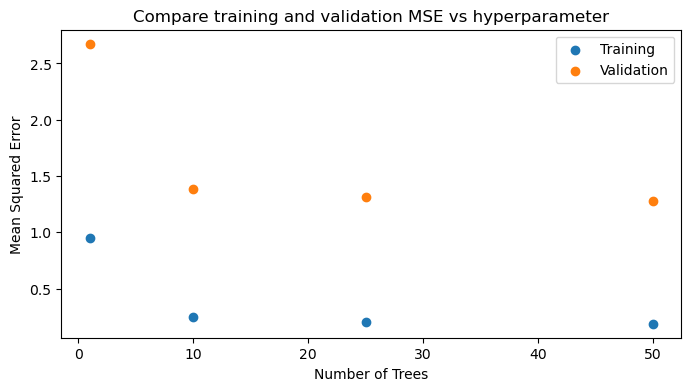

Minimum Mean Squared Error:  1.2795
Number of Trees at minimum:  50


In [274]:
# plot number of trees vs train and test MSE

opt_dict_array = opt_dict["n_estimators"]                     # array of grid points (x-axis)
train_mse = CV.cv_results_["mean_train_neg_mean_squared_error"] # MSE of training set at each grid point (y-axis)
test_mse = CV.cv_results_["mean_test_neg_mean_squared_error"]   # MSE of test set at each grid point (y-axis)

fig1,ax1 = plt.subplots(figsize=(8,4))
ax1.scatter(opt_dict_array, -train_mse)
ax1.scatter(opt_dict_array, -test_mse)
# ax1.fill_between(opt_dict_array, -train_mse, -test_mse, alpha=0.1)
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Compare training and validation MSE vs hyperparameter')
plt.legend(["Training","Validation","difference"])
plt.show()
print("Minimum Mean Squared Error: ", round(min(-test_mse),4))
print("Number of Trees at minimum: ", opt_dict_array[np.argmin(-test_mse)])

<div class = "exercise">

### Exercise 6.1<a name="e6.1"></a>
Before diving into the questions lets run a few different grid searches to get a feel for how it works. By default the notebook is setup with a very rough grid search which should run quickly. be careful adding too many grid points because it is possible to slow down the grid search to the point of not finishing in hours or days. As a rule of thumb lets not set number of trees to be above 100, and lets not include more than 10 individual grid points in any one search. Try to get a sense of how performance varies with number of trees. Before answering questions below set your grid to be [1,3,5,7,10,15,20,50] which should give a reasonable spread of values. As a reminder these edits are made in the section above "defining a parameter space" 

Questions:  
1. Looking just at the training data curve above, what is the number for `n_estimators` that gives the smallest MSE?
2. How about for the validation data? Which value for `n_estimators` gives the smallest MSE?  
3. Look at the trend in validation data. If n_estimators was increased beyond 50 do you think the model would change in performance significantly?  
4. Do we expect the model get more complex as we increase the number of trees?  
5. Looking at just the validation curve, does increasing number of trees seem to increase overfitting at any point on the curve? This would show up as worsening performance in the validation data as trees increase.

[Check or Submit Answers](#a6.1)

</div>

### Answer Exercise 6.1
1. 50

2. 50

3. If the MSE stabilizes and no longer significantly decreases beyond 50 trees, adding more trees may not significantly change the model's performance. Typically, the curve levels off after a certain number of trees. Therefore, I think the model would not change in performance significantly.

4. The complexity of a Random Forest model does increase to some extent as the number of trees is increased, but it does not increase linearly. Random Forest is an ensemble learning method composed of multiple decision trees, each of which is trained on the data. Each tree is a basic classification or regression model, and their complexity is typically not very high.

5. If the MSE of the validation data continues to decrease as the number of trees increases, the model may be overfitting to the validation data. Overfitting can lead to a decrease in performance on new, unseen data. Therefore, if the MSE of the validation data starts to rise after a certain number of trees, it may be a sign of overfitting. When the curve shows signs of stabilization or decreasing validation performance, it typically means that as the number of trees increases, the Mean Squared Error (MSE) or other performance metrics start to level off or even increase. This may indicate that the model no longer improves significantly with an increased number of trees and might even start to overfit the data. Therefore, as the number of trees increases, and the validation performance no longer significantly improves, it's a signal that should be approached with caution.

<div class = "lesson">

### Default vs. optimized model: cross-validation performance<a name = "lesson6.5"></a>

<div class = "cellContent">

Looking at the previous learning cuve of performance versus the number of trees we can see the more trees seems to be giving better performance, however past 20 trees the rate of improvement seems to decrease dramatically. Going forward we'll assume we're using a forest of 50 trees which should give significant improvement in performance compared to where we started.

Note: Recall that at each grid point, we are splitting the dataset into 5 random folds and repeating this process 5 times, which means we have trained 50 different decision tree models using the same hyperparameter at that grid point total. Every error metric you see below is the average value across 25 different models with the same hyperparameters but different splits of the training data.

Error metrics below are for models with the best hyperparameter from the previous grid search, so make sure the last time you ran the grid search the largest number of trees was 50! You can check if you did this correctly with the cell block below, the `n_estimators` value should be 50

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [275]:
# check what the best parameters identified in the grid search were
CV.best_params_

{'bootstrap': 'True', 'n_estimators': 50}

In [276]:
# Extract cross validation performance metrics for the optimized model
opt_CV_stats = CV_best_stats(CV,y_train)

Average test RMSE:  1.1311 (0.0 for perfect prediction)
Average test RMSE/std:  0.4922 (0.0 for perfect prediction)
Average test MAE:  0.7632 (0.0 for perfect prediction)
Average test R2:  0.7488 (1.0 for perfect prediction)


To compare back to our default model we can construct another grid search that only uses "1" for `n_estimators`. That way it will still be the best model available.

We do CV on a single grid point ("1"), build 25 different models, and average across them to get the results below.

Now we can directly compare the model's performance on these metrics generated from the Kfold cross validation.

In [277]:
default_opt_dict = {'n_estimators':[1]}

default_CV = GridSearchCV(Default_model,
                          default_opt_dict,
                          cv=kfold,
                          return_train_score=True,
                          scoring=['neg_mean_squared_error','r2','neg_mean_absolute_error'],
                          refit='neg_mean_squared_error')
default_CV = default_CV.fit(X_train,y_train)

default_CV_stats = CV_best_stats(default_CV,y_train)

Average test RMSE:  1.4691 (0.0 for perfect prediction)
Average test RMSE/std:  0.6393 (0.0 for perfect prediction)
Average test MAE:  0.9779 (0.0 for perfect prediction)
Average test R2:  0.5774 (1.0 for perfect prediction)


<div class = "exercise">

### Exercise 6.2<a name="e6.2"></a>
Questions:  
1. Do we get improvement in the RMSE between the default and optimized model? What is the percentage improvement ($|RMSE_{test opt}-RMSE_{test default}|/RMSE_{test default}$)?   

For this lab we'll assume that the RMSE metric gives a reasonable error estimate on predictions. So any prediction we made we'll assume it has + or - the CV RMSE value.   
2. Assuming this level of accuraccy from the optimized model. Is our model accurate enough to predict single-junction solar materials? where the key design metric is having a band gap between 1.1 eV and 1.7 eV?  
3. How about our other task. Is the optimized model accurate enough to predict high bandgap materials? where the key metric is ensuring predictions are above 3 eV?

[Check or Submit Answers](#a6.2)

</div>

### Answer Exercise 6.2

1. Percentage Improvement = ∣1.1311 − 1.4691∣ / 1.4691 × 100 ≈ 23.01%;

    Yes, we have indeed observed an improvement in RMSE between the default model and the optimized model. The average test RMSE for the optimized model is 1.1311 eV, whereas for the default model, it is 1.4691 eV. Therefore, the RMSE of the optimized model is lower than that of the default model, indicating an enhancement in model performance on the test data.

2. With the optimized model's RMSE of 1.1311, it indicates that, on average, the model's predictions have an error of about 1.1311 eV. While this represents an improvement over the default model, it's still relatively high for predicting single-junction solar materials, where the key design metric is having a band gap between 1.1 eV and 1.7 eV. The model's accuracy may not be sufficient for this task.

3. Similarly, for predicting high bandgap materials (above 3 eV), the optimized model's performance with an RMSE of 1.1311 may still not be accurate enough. High bandgap materials require precise identification, and the model's average error of about 1.1311 eV may not meet this requirement effectively.

<div class = "lesson">

### Default vs. optimized model: training and test data performance<a name = "lesson6.6"></a>

<div class = "cellContent">

The goal is to optimize performance on unseen data

Now, remember that we also have the set of Test data that we held out before any hyperparameter optimization. Lets see how the model has changed in predicting that data. We'll make the same two parity plots as before where we use the new optimized hyperparameters.

We use the optimized hyperparameters to refit the model using the entire training set.

</div> <!-- closes content -->

</div> <!-- closes lesson -->

In [278]:
# Refit the model using the best hyperparameters
DT2 = CV.best_estimator_.fit(X_train,y_train)

# predict both the train and test data
Train_predictions2 = DT2.predict(X_train)
Test_predictions2 = DT2.predict(X_test)

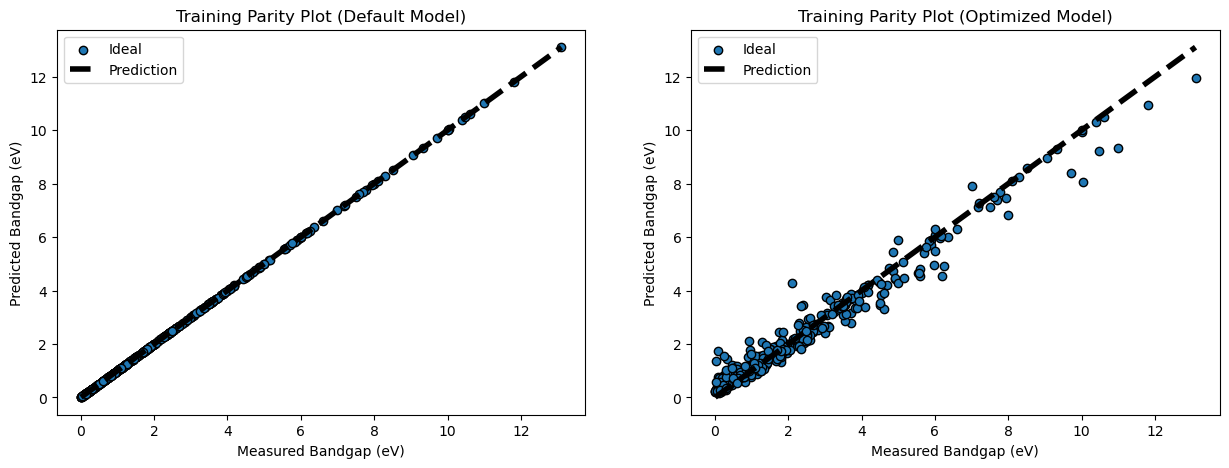

,Error Metric,Training Set (Default Model),Training Set (Optimized Model),Note
0,RMSE,0.0003 (eV),0.4226 (eV),(0.0 for perfect prediction)
1,RMSE/std,0.0001,0.1839,(0.0 for perfect prediction)
2,MAE,0.0 (eV),0.274 (eV),(0.0 for perfect prediction)
3,R2,1.0,0.9662,(1.0 for perfect prediction)


In [279]:
parity_plots_side_by_side(y_train,Train_predictions,y_train,Train_predictions2,title_left="Training Parity Plot (Default Model)",title_right="Training Parity Plot (Optimized Model)") # build both plots
parity_stats_side_by_side(y_train,Train_predictions,y_train,Train_predictions2,"Training Set (Default Model)","Training Set (Optimized Model)")

<div class = "exercise">

### Exercise 6.3<a name="e6.3"></a>
Questions:  
1. Look at both the parity plots and the training data statistics. Does the optimized model do better or worse at predicting the training data than the default model?  
2. Do prediction performances on training data give you enough information to decide which model is more likely to give better predictions on Si and $\text{SiO}_2$, which are not in the training set or the test set? Another way to ask this is does the training data result tell us anything about the predictive power of the model?

[Check or Submit Answers](#a6.3)

</div>

### Answer Exercise 6.3

1. The default model has an RMSE of 0.0003 eV on the training data, while the optimized model has an RMSE of 0.4226 eV. The RMSE/std for the default model on the training data is 0.0001, while for the optimized model, it's 0.1839. The default model has an MAE of 0.0 eV on the training data, while the optimized model has an MAE of 0.274 eV. The R2 for the default model on the training data is 1.0, while for the optimized model, it's 0.9662. From these data, it appears that the optimized model performs relatively worse at predicting the training data compared to the default model. The RMSE, RMSE/std, MAE, and R2 for the optimized model are all larger than those of the default model, indicating that the optimized model has a larger prediction error on the training data and may not have fit the training data very well.

    If the model performs well on the training data, the predicted values should closely align with the actual values, forming a distribution that closely follows a 45-degree line. If the predicted values deviate from the 45-degree line and consistently exhibit overestimation or underestimation within a certain range of bandgap values, then the model may perform poorly within that range. According to the graph, the distribution closely follows a 45-degree line in the default model. However, in the optimized model, the predicted values deviate from the 45-degree line. Again, the optimized model has a larger prediction error on the training data and may not have fit the training data very well.

2. The results on the training data are primarily used to assess the model's fit to the training data but may not adequately reflect the model's performance on unknown materials such as Si and SiO2, which are not included in the training set or test set. To evaluate the model's predictive ability on materials like Si and SiO2, it is best to directly make predictions on these materials and assess the model's performance. Therefore, the performance of the training data typically cannot serve as a sufficient basis for predicting the model's performance on unknown materials.

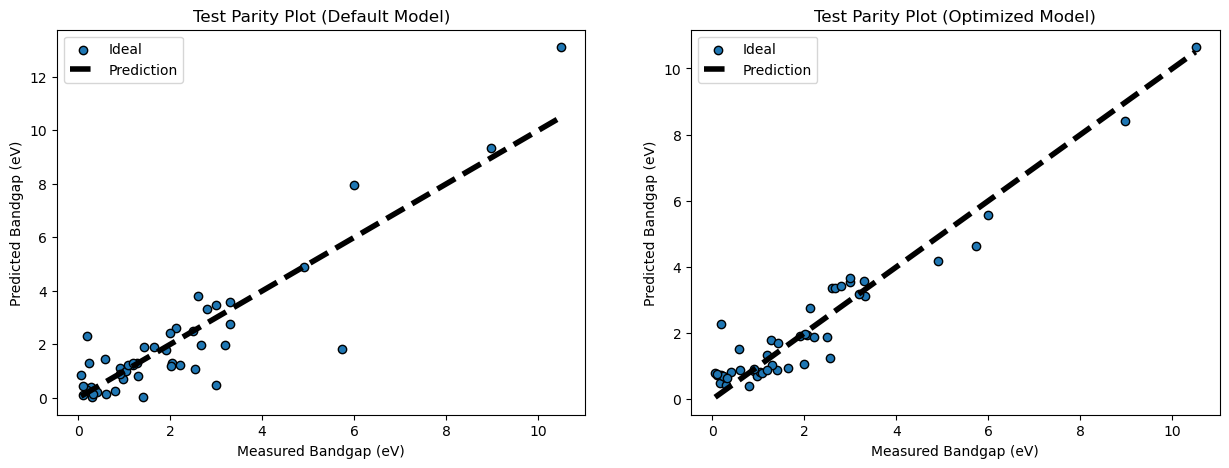

,Error Metric,Test Set (Default Model),Test Set (Optimized Model),Note
0,RMSE,1.0492 (eV),0.6062 (eV),(0.0 for perfect prediction)
1,RMSE/std,0.4884,0.2822,(0.0 for perfect prediction)
2,MAE,0.6811 (eV),0.4776 (eV),(0.0 for perfect prediction)
3,R2,0.7614,0.9204,(1.0 for perfect prediction)


In [280]:
parity_plots_side_by_side(y_test,Test_predictions,y_test,Test_predictions2, title_left="Test Parity Plot (Default Model)",title_right="Test Parity Plot (Optimized Model)") # build both plots
parity_stats_side_by_side(y_test,Test_predictions,y_test,Test_predictions2,"Test Set (Default Model)","Test Set (Optimized Model)")

<div class = "exercise">

### Exercise 6.4<a name="e6.4"></a>
Questions:  
1. Just looking at the testing data statistics, does the optimized model do better or worse at predicting the testing data?
2. Compare the difference between train and test RMSE for the default and optimized model. Did the difference between training and test performance increase or decrease after hyperparameter optimization?  
3. Is this evidence that the optimized model is more overfit or less overfit?  
[Check or Submit Answers](#a6.4)

</div>

### Answer Exercise 6.4

1. Looking at the testing data statistics, the optimized model performs better at predicting the testing data. The optimized model has a testing data RMSE of 0.6062 eV, whereas the default model has a testing data RMSE of 1.0492 eV. Additionally, the optimized model outperforms the default model in terms of testing data RMSE/std, MAE, and R2.

2. The difference in RMSE between the training and test sets for the default model is 1.0492 - 0.0003 = 1.0489 (eV), while for the optimized model, it is 0.6062 - 0.4226 = 0.1836 (eV). The difference between training and test RMSE decreased after hyperparameter optimization. Specifically, the difference decreased from approximately 1.0489 (eV) for the default model to approximately 0.1836 (eV) for the optimized model.

3. This decrease in the difference between training and test RMSE suggests that the optimized model is less overfit compared to the default model. The smaller gap between training and test performance indicates improved generalization of the optimized model to unseen data, which is evidence of reduced overfitting.

<div class = "exercise">

### Exercise 6.5<a name="e6.5"></a>
Questions:  

1. Based on your answers to exercise 6.3 and 6.4, if you were to choose between the default model and the optimized model, what decision will you make? Give at least 3 criteria for your evaluation.

[Check or Submit Answers](#a6.5)

</div>

1. Lower Test RMSE: The optimized model has a lower Test RMSE (0.6062 eV) compared to the default model (1.0492 eV). Lower RMSE indicates that the optimized model provides more accurate predictions on the test data, which is a critical criterion for model selection.

2. Reduced Overfitting: The optimized model exhibits a smaller difference between the Training and Test RMSE (0.1836 eV) compared to the default model (1.0489 eV). This suggests that the optimized model is less prone to overfitting and generalizes better to unseen data, which is an essential factor for model reliability.

3. Higher Test R2 Score: The optimized model has a higher Test R2 score (0.9204) compared to the default model (0.7614). A higher R2 score indicates that the optimized model explains a larger portion of the variance in the test data, signifying its superior predictive power.

<div class = "section">

# 7. Making Predictions<a name="7"></a>
---
[Back to TOC](#toc)

<div class = "cellContent">

## Overview
In the final section of the lab we'll do one final test to gauge the model's performance. We've been trying throughout the lab to highlight the importance of keeping a model's use case in mind throughout the process and building and training. In our case we are focusing on two potential use cases. In predicting solar materials which require a bandgap between 1.1 and 1.7 eV, and wide bandgap materials which want a bandgap above 3 eV. 

In the more general sense, important questions to ask are things like:  
1) what is the necessary accuracy for predictions I want to make? For example we've highlighted two use cases for our band gap model, one that requires a much more accurate model than the other.  
2) What is the feature space I want to predict in (What compositions are we interested in predicting)? Our dataset is trained entirely on binary and elementary semiconductors. Making predictions outside of this space would be very risky as a lot of our error estimates might break down.
 

## Learning Outcomes
1. Judge model performance for two different applications
2. Assess previous error predictions
3. Propose improvements to an existing model


</div> <!-- closes content -->

</div> <!-- closes section -->

Remember back when we first trained the model and predicted Silicon and Silica? Let do the same thing for fun with the optimized model. The values have likely shifted.

When we fit the DT3 model we use the X_predict and y_predict versions of the dataset in which we removed 5 compounds so that we could predict them now. Note that these predictions are a bit artificial because when we did the model optimization this data was included. In a true research environment this isn't something you'd want to do.

In [281]:
# fit model to all data except for the values we want to predict.
DT3 = CV.best_estimator_.fit(X_predict,y_predict)

Edit the cell below to change which compound is predicted between: Silicon, Silica, Salt, Diamond, and Tin

Change the Prediction_features object to one of the following:  
xpredict_Si  
xpredict_SiO2  
xpredict_NaCl  
xpredict_C  
xpredict_Sn  

In [282]:
### MAKE EDITS BELOW HERE ###

Prediction_features = xpredict_Si

### MAKE EDITS ABOVE HERE ###

# make a prediction with the trained DT3 model
print("Predicted Band Gap: ",DT3.predict(Prediction_features))

Predicted Band Gap:  [1.4877]


Now for our final test on model performance. We are going to take the individual predictions on our Test data set and quantify how often the model succeeded or failed in making predictions for both the Solar application and Wide Band Gap application. Below we've rearranged the existing data from the parity plots in the previous section and printed it explicitly so we can look in more detail.

In doing this we are viewing the results of this regression model through the lens of classificaiton. Essentially the materials with known values in a certain range will be viewed as one class of materials, and everything else as another class. We'll then assess how well the model does at correctly identifying these classes of materials. If you want you read up on the background related to a few of these metrics you can look into the metrics precision and recall for binary classifiers. During the exercises below we'll walk through the process of calculating the recall for this pseudo-classification model.

In [283]:
# combine previous data into one dataframe for visualization
predictions_combined = pd.DataFrame(list(zip(y_test,Test_predictions2)),columns=['test','predictions'])

In [284]:
# sort on the Test values from low to high
predictions_combined.sort_values("test")

,test,predictions
31,0.064,0.790620
39,0.100,0.769340
10,0.100,0.725600
0,0.170,0.494000
21,0.200,2.284800
20,0.200,0.743690
37,0.230,0.700720
7,0.270,0.668420
9,0.310,0.421760
43,0.332,0.635540


<div class = "exercise">

### Exercise 7.1<a name="e7.1"></a>
Questions:  

The first task was a use case where we want to predict single-junction solar materials and they need to have a band gap between 1.1 eV and 1.7 eV to have decent efficiency.  
1. In the Test dataset how many materials do we have with band gaps within the range of being a good solar material? Note in terms of classification we are identifying the number of positive cases in the dataset.  
2. Now we'll compare to the Predictions. Find the number of times the positive cases identified in question 1 are predicted to be single-junction solar materials (between 1.1 and 1.7 eV). This is referred to as the number of true positives, the number of times the positive cases were predicted correctly. Divide this number of true positives by the total number of positive cases (from question 1) to obtain the recall value. What is the recall of our pseudo-classifier to predict single-junction solar materials?

The second task was to identify high bandgap materials such as GaN, where the bandgap at at or above 3 eV.  
3. In the Test dataset how many materials do we have with band gaps at or above 3 eV?  
4. Perform the same process from question 2 (remember are classes are now defined differently for this new task) and calculate the recall for predicting high bandgap materials. What is the recall in this case?

Think about the performance of the model in correctly completing both of the prediction tasks on the test dataset.
5. Based on the evidence from questions 1-4 which tasks can the model succeed at?

Challenges (optional questions):
6. There are a number of other classification metrics we could have used to assess the performance of the model on the two potential tasks. Calculate the precision and false discovery rate for the two tasks. Do these metrics support the conclusion you made in question 5? We ignored this earlier in favor of simplicity, but potentially there is a more nuanced understanding of how the models might perform.

[Check or Submit Answers](#a7.1)

</div>

# The End

So, are we officially done? What's next in the machine learning workflow?

- hopefully you have your research problem down at this point. or else, figure out what you need to know, and whether ML can help with that
- go back and reiterate on hyperparameter tuning
- use a different model
    - get uncertainty estimate on your prediction by going from (decision) tree to (random) forest
- redo data cleaning/featurization
- get more data

what should you do next as a student?

if this is only interesting to you, and you don't plan to do ML yourself in the near future: solidify the big ideas and key takeaways.

if you want to get hands-on with ML:
- think about your data  
- go through the lab again and figure out each line of code  
- change parameters and do all the challenges  
- read the docs for software packages such as scikit-learn or mastml that help us perform these machine learning workflows.


 <div class = "answers">

### Answers<a name="answers"></a>

* [Back to TOC](#toc)


These are the answers for the code exercises.

</div>

#### [Back to Exercise 1.1](#e1.1) <a name="a1.1"></a>
1. There are duplicate entries for the same chemical formula  

#### [Back to Exercise 1.2](#e1.2) <a name="a1.2"></a>

1. 1447 data points  
2. 467 data points  

#### [Back to Exercise 1.3](#e1.3) <a name="a1.3"></a>
1. 13.591 eV  (13.096 eV if using the corrected averaging)  
2. 5 eV would be much too large to be a useful prediction, being more than twice the standard deviation of the data  
3. 0.5 eV would be a useful prediction error, being less than a quarter of the standard deviation in the dataset  

#### [Back to Exercise 1.4](#e1.4) <a name="a1.4"></a>
1. No, there is significantly more data between 0 and 1 eV  
2. No, making predictions above 5 eV might be unreasonable because we have so little data at the high end.  
3. We might consider throwing out some low bandgap data to make this more balanced.  

#### [Back to Exercise 1.5](#e1.5) <a name="a1.5"></a>
1. O, Se, S, Te, As  
2. Lu, Tm, Ir, Y, Ta  
3. Most confident in predictions of Oxides, then predictions containing Iridium, and least confident in predictions of an element that the model hasn't seen before 

#### [Back to Exercise 2.1](#e2.1) <a name="a2.1"></a>
1. 87 (scroll down to the bottom of the dataframe to see the nubmer of columns - each column represents a feature)

#### [Back to Exercise 2.2](#e2.2) <a name="a2.2"></a>
1. \begin{equation} \frac{3 * 3 + 51 * 1}{1 + 3} = 15 \end{equation}

#### [Back to Exercise 3.1](#e3.1) <a name="a3.1"></a>
1. 86  
2. No  

#### [Back to Exercise 3.2](#e3.2) <a name="a3.2"></a>
1. 71  
2. No (would be if very low like less than 10)

#### [Back to Exercise 4.1](#e4.1) <a name="a4.1"></a>
1. No the train and test splits are not identical, there may be some differences between train and test

#### [Back to Exercise 5.1](#e5.1) <a name="a5.1"></a>
1. 
    A. Yes, the predictions line up with the ideal line really well.  
    B. No.  
    C. No, there is no consistent deviation from the ideal line.  
2. Yes.  
3. Yes.

#### [Back to Exercise 5.2](#e5.2) <a name="a5.2"></a>
1.  
    A. Yes. The majority of predictions still lines up with the ideal line.  
    B. Yes, there are around 5-6 outliers spread out across the range of measured bandgaps.  
    C. No. Although there is more overall deviation from the ideal line, the predictions are spread out evenly on both sides of the ideal line across the entire range and show no consistent over/underpredicting.  
2. No. This use case requires that the prediction error doesn't exceed 0.3eV, but the test data RMSE is 1.2615 eV.  
3. Yes.

#### [Back to Exercise 5.3](#e5.3) <a name="a5.3"></a>
1. Better on training set, worse on test set.  
2. Overfit  
3. we need to use test data because the goal of ML, in our case, is to predict properties of materials that the model hasn't seen before, and test set performance is more representative of the prediction task.  

#### [Back to Exercise 5.4](#e5.4) <a name="a5.4"></a>
1. 10  
2. 1  
3. 1  
4. This supports the idea of the model being overfit as each training data point has it's own leaf node.

#### [Back to Exercise 6.1](#e6.1) <a name="a6.1"></a>

1. 50  
2. 50  
3. No, the model isn't changing as maximum leaf nodes increases beyond 20  
4. Yes, the model is increasing in complexity as we add more trees  
5. No, the model consistently improves in performance so it doesn't look like overfitting is increasing

#### [Back to Exercise 6.2](#e6.2) <a name="a6.2"></a>

1. Yes we see an improvement of 23.52%   
2. No.  
3. Yes.  

#### [Back to Exercise 6.3](#e6.3) <a name="a6.3"></a>

1. The optimized model is worse at predicting training data
2. No, test or validation predictions are necessary to estimate predictive performance

#### [Back to Exercise 6.4](#e6.4) <a name="a6.4"></a>

1. The optimized model does better at predicting test data.  
2. The difference between training and test performance decreased after hyperparameter optimization.  
3. Less overfit, between the training data is more similar to test data.  

#### [Back to Exercise 6.5](#e6.5) <a name="a6.5"></a>

1. In this lab, we use 3 main criteria for model selection:  
    1. Higher cross-validation score, which measures model prediction performance on unseen data  
    2. Better performance on test data, which also measures model prediction merformance on unseen data  
    3. Less overfit, which suggests the model is less likely to be adversely affected by spurious patterns in the training data  
    
   The optimized model has a higher CV score (see exercise 6.3), better performance on test data (exercise 6.4) and is less overfit (exercise 6.4) than the default model. We choose the optimized model because we expect it to have better final prediction performance based on the 3 criteria listed above.


#### [Back to Exercise 7.1](#e7.1) <a name="a7.1"></a>

1. 7 materials between 1.1 and 1.7 eV  
2. 1/7 of the materials is predicted in the range, ~14% of the time  
3. 9 materials at or above 3 eV  
4. 100% of materials are correctly predicted above 3 eV  
5. The second task of identifying wide bandgap materials the model succeeds at  
